In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv("/Users/jojotan/Documents/Portfolio/Video_Games/vgsales.csv")
df.shape

(16598, 11)

In [3]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
#cleaned dataset separately in another notebook due to long cell of code inputs
#added additional column 'main publisher' to group those with divisions / formed during mergers or jv,
#mainly for top 10 publishers (sales-wise)
clean_df = pd.read_csv("/Users/jojotan/Documents/Portfolio/Video_Games/clean_vgsales.csv")
clean_df.shape

(16592, 12)

In [5]:
clean_df.isna().sum()

Rank              0
Name              0
Platform          0
Year              0
Genre             0
Main Publisher    0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
clean_df = clean_df.astype({"Year": int})
clean_df.dtypes

Rank                int64
Name               object
Platform           object
Year                int64
Genre              object
Main Publisher     object
Publisher          object
NA_Sales          float64
EU_Sales          float64
JP_Sales          float64
Other_Sales       float64
Global_Sales      float64
dtype: object

In [7]:
#stats before cleaning
name_count = df["Name"].nunique()
platform_count = df["Platform"].nunique()
genre_count = df["Genre"].nunique()
publisher_count = df["Publisher"].nunique()
print('Total number of Games:', name_count)
print('Total number of Platforms:', platform_count)
print('Total number of Genres:', genre_count)
print('Total number of Publishers:', publisher_count)
print('Earliest Year Recorded:', df.Year.min())
print('Latest Year Recorded:', df.Year.max())

Total number of Games: 11493
Total number of Platforms: 31
Total number of Genres: 12
Total number of Publishers: 578
Earliest Year Recorded: 1980.0
Latest Year Recorded: 2020.0


In [8]:
clean_df.head()

Rank                      Name Platform  Year         Genre Main Publisher  \
0     1                Wii Sports      Wii  2006        Sports       Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform       Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing       Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports       Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing       Nintendo   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0  Nintendo     41.49     29.02      3.77         8.46         82.74  
1  Nintendo     29.08      3.58      6.81         0.77         40.24  
2  Nintendo     15.85     12.88      3.79         3.31         35.82  
3  Nintendo     15.75     11.01      3.28         2.96         33.00  
4  Nintendo     11.27      8.89     10.22         1.00         31.37

In [9]:
#stats after cleaning
clean_name_count = clean_df["Name"].nunique()
clean_platform_count = clean_df["Platform"].nunique()
clean_genre_count = clean_df["Genre"].nunique()
clean_publisher_count = clean_df["Publisher"].nunique()
print('Total number of Games:', clean_name_count)
print('Total number of Platforms:', clean_platform_count)
print('Total number of Genres:', clean_genre_count)
print('Total number of Publishers:', clean_publisher_count)
print('Earliest Year Recorded:', clean_df.Year.min())
print('Latest Year Recorded:', clean_df.Year.max())

Total number of Games: 11491
Total number of Platforms: 31
Total number of Genres: 12
Total number of Publishers: 582
Earliest Year Recorded: 1977
Latest Year Recorded: 2020


In [10]:
pip install --upgrade plotly

     |████████████████████████████████| 15.5 MB 8.3 MB/s eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.14.1
    Uninstalling plotly-5.14.1:
      Successfully uninstalled plotly-5.14.1
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install plotly-express

Note: you may need to restart the kernel to use updated packages.


## Platform Release & Sales Distribution

In [12]:
platform_game_count_pivot = pd.pivot_table(clean_df,index=['Platform'],values=['Name'], aggfunc=[len],fill_value=0)
platform_game_count_df = platform_game_count_pivot.reset_index()
platform_game_count_df = platform_game_count_df.droplevel(1, 1)
platform_game_count_df.columns = ['Platform', 'No. of Games']
platform_game_count_df.sort_values(by = ['No. of Games'],
                                   ascending = False,
                                   inplace = True)
platform_game_count_df.head(10)

Platform  No. of Games
4        DS          2162
16      PS2          2161
17      PS3          1328
26      Wii          1324
28     X360          1263
19      PSP          1212
15       PS          1196
13       PC           960
29       XB           824
6       GBA           822

In [13]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [14]:
import plotly.express as px
from plotly.offline import iplot

In [15]:
color1 = "#D4CC47"
color2 = "#7C4D8B"
fig = px.treemap(platform_game_count_df, 
                 path=['Platform'],
                 values='No. of Games', 
                 width=900, 
                 height=600,
                 title = 'Platform Distribution based on Number of Games Released')
fig.update_layout(
    treemapcolorway = get_color_gradient(color1, color2, len(platform_game_count_df['Platform'])),
    margin = dict(t=50, l=25, r=25, b=25))
iplot(fig)

In [16]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

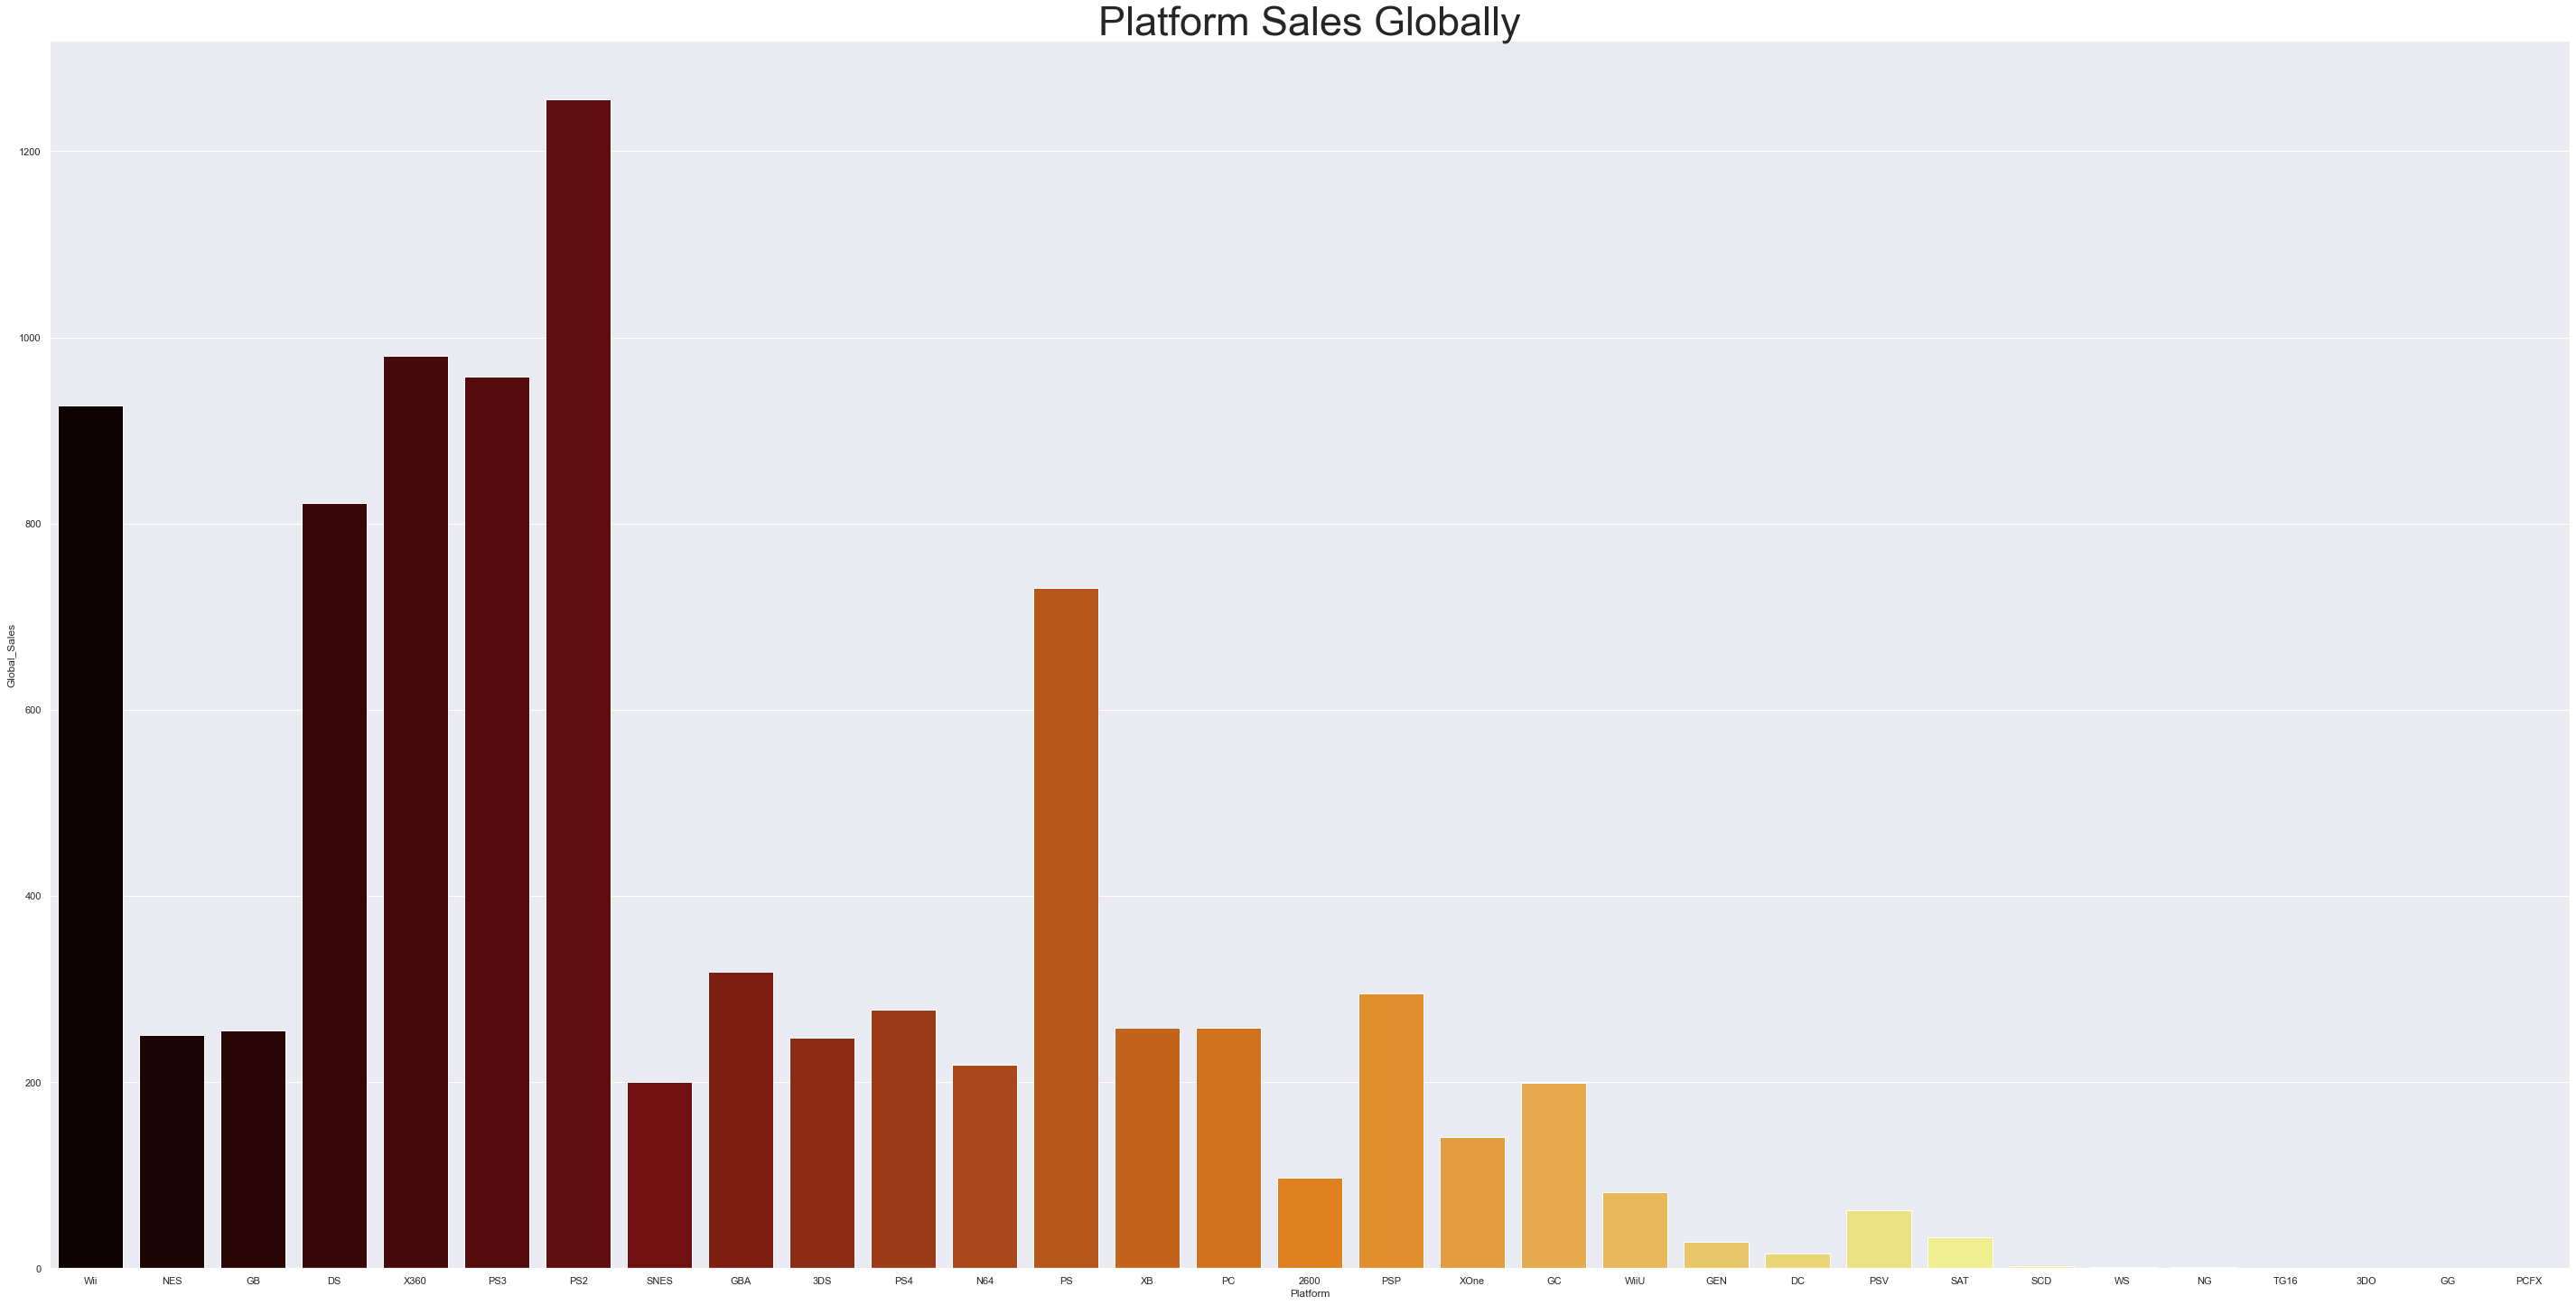

In [17]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.set(font_scale = 3)
sns.barplot(data = clean_df, 
            x = 'Platform', 
            y = 'Global_Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('afmhot', n_colors = 31)).set_title('Platform Sales Globally', fontdict = {'size': 45})
wrap_labels(ax, 10)

There is a total of 31 platforms where games were released on, with Nintendo DS (DS) and PlayStation2 (PS2) - released in 2004 and 2000 respectively - having the most number of games, followed by PlayStation3 (PS3) and Wii which were both released in 2006.

Despite DS and PS2 having similar number of games released (difference of only one), the latter's sales figures far surpasses that of the former's. We can surmise that this could be due to the types of games released on PS2 being more popular or that having been released four years earlier than the DS has allowed more consumers to own the console, resulting in a bigger target audience.

PS3 and Wii, like the number of games released on each respective platform, are similar in terms of global game sales as well. It is, however, interesting to note that while Xbox 360, released in 2005, (X360) came in fifth in terms of games released, it is second in global sales. We can attribute this to the popularity of the types of games released on the platform as publishers would most likely have released the same games on both PS2 and X360 (and PS3 later) given the similarity of the design and function of both consoles. All of the platforms that fall under the top five in terms of games release, except for Wii, are the top-selling platforms in the various regions, albeit different for each one which reflects the platform preference of each region.

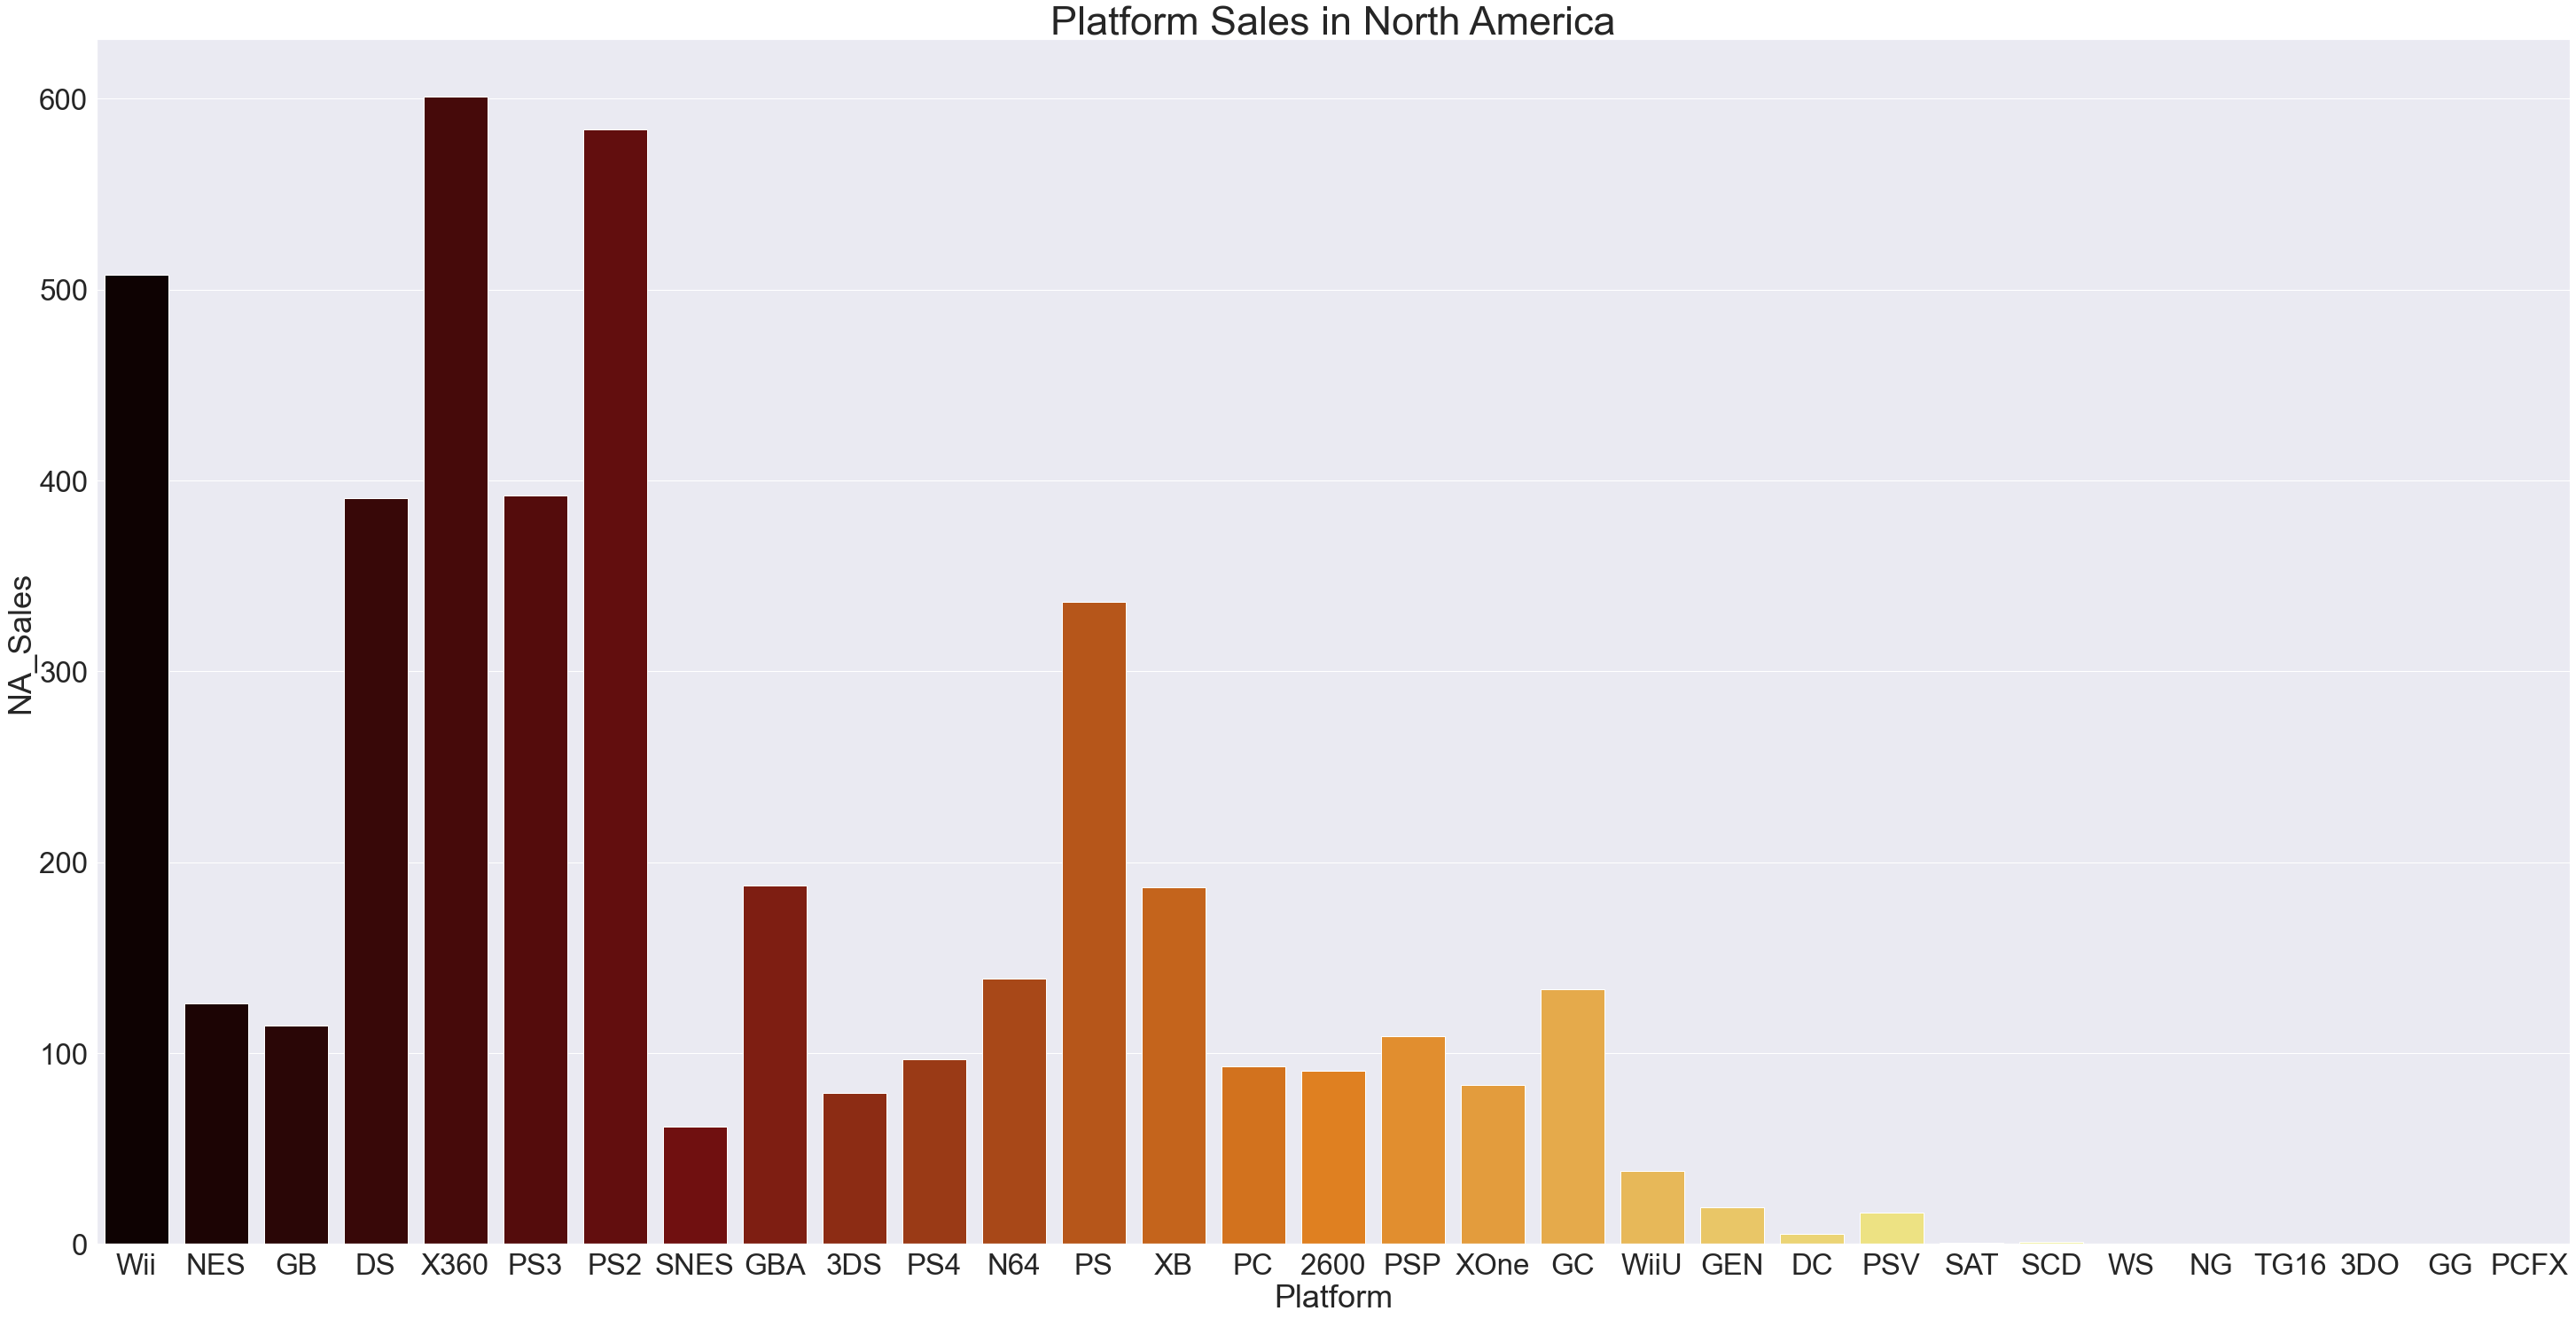

In [18]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.set(font_scale = 3)
sns.barplot(data = clean_df, 
            x = 'Platform', 
            y = 'NA_Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('afmhot', n_colors = 31)).set_title('Platform Sales in North America', fontdict = {'size': 45})
wrap_labels(ax, 10)

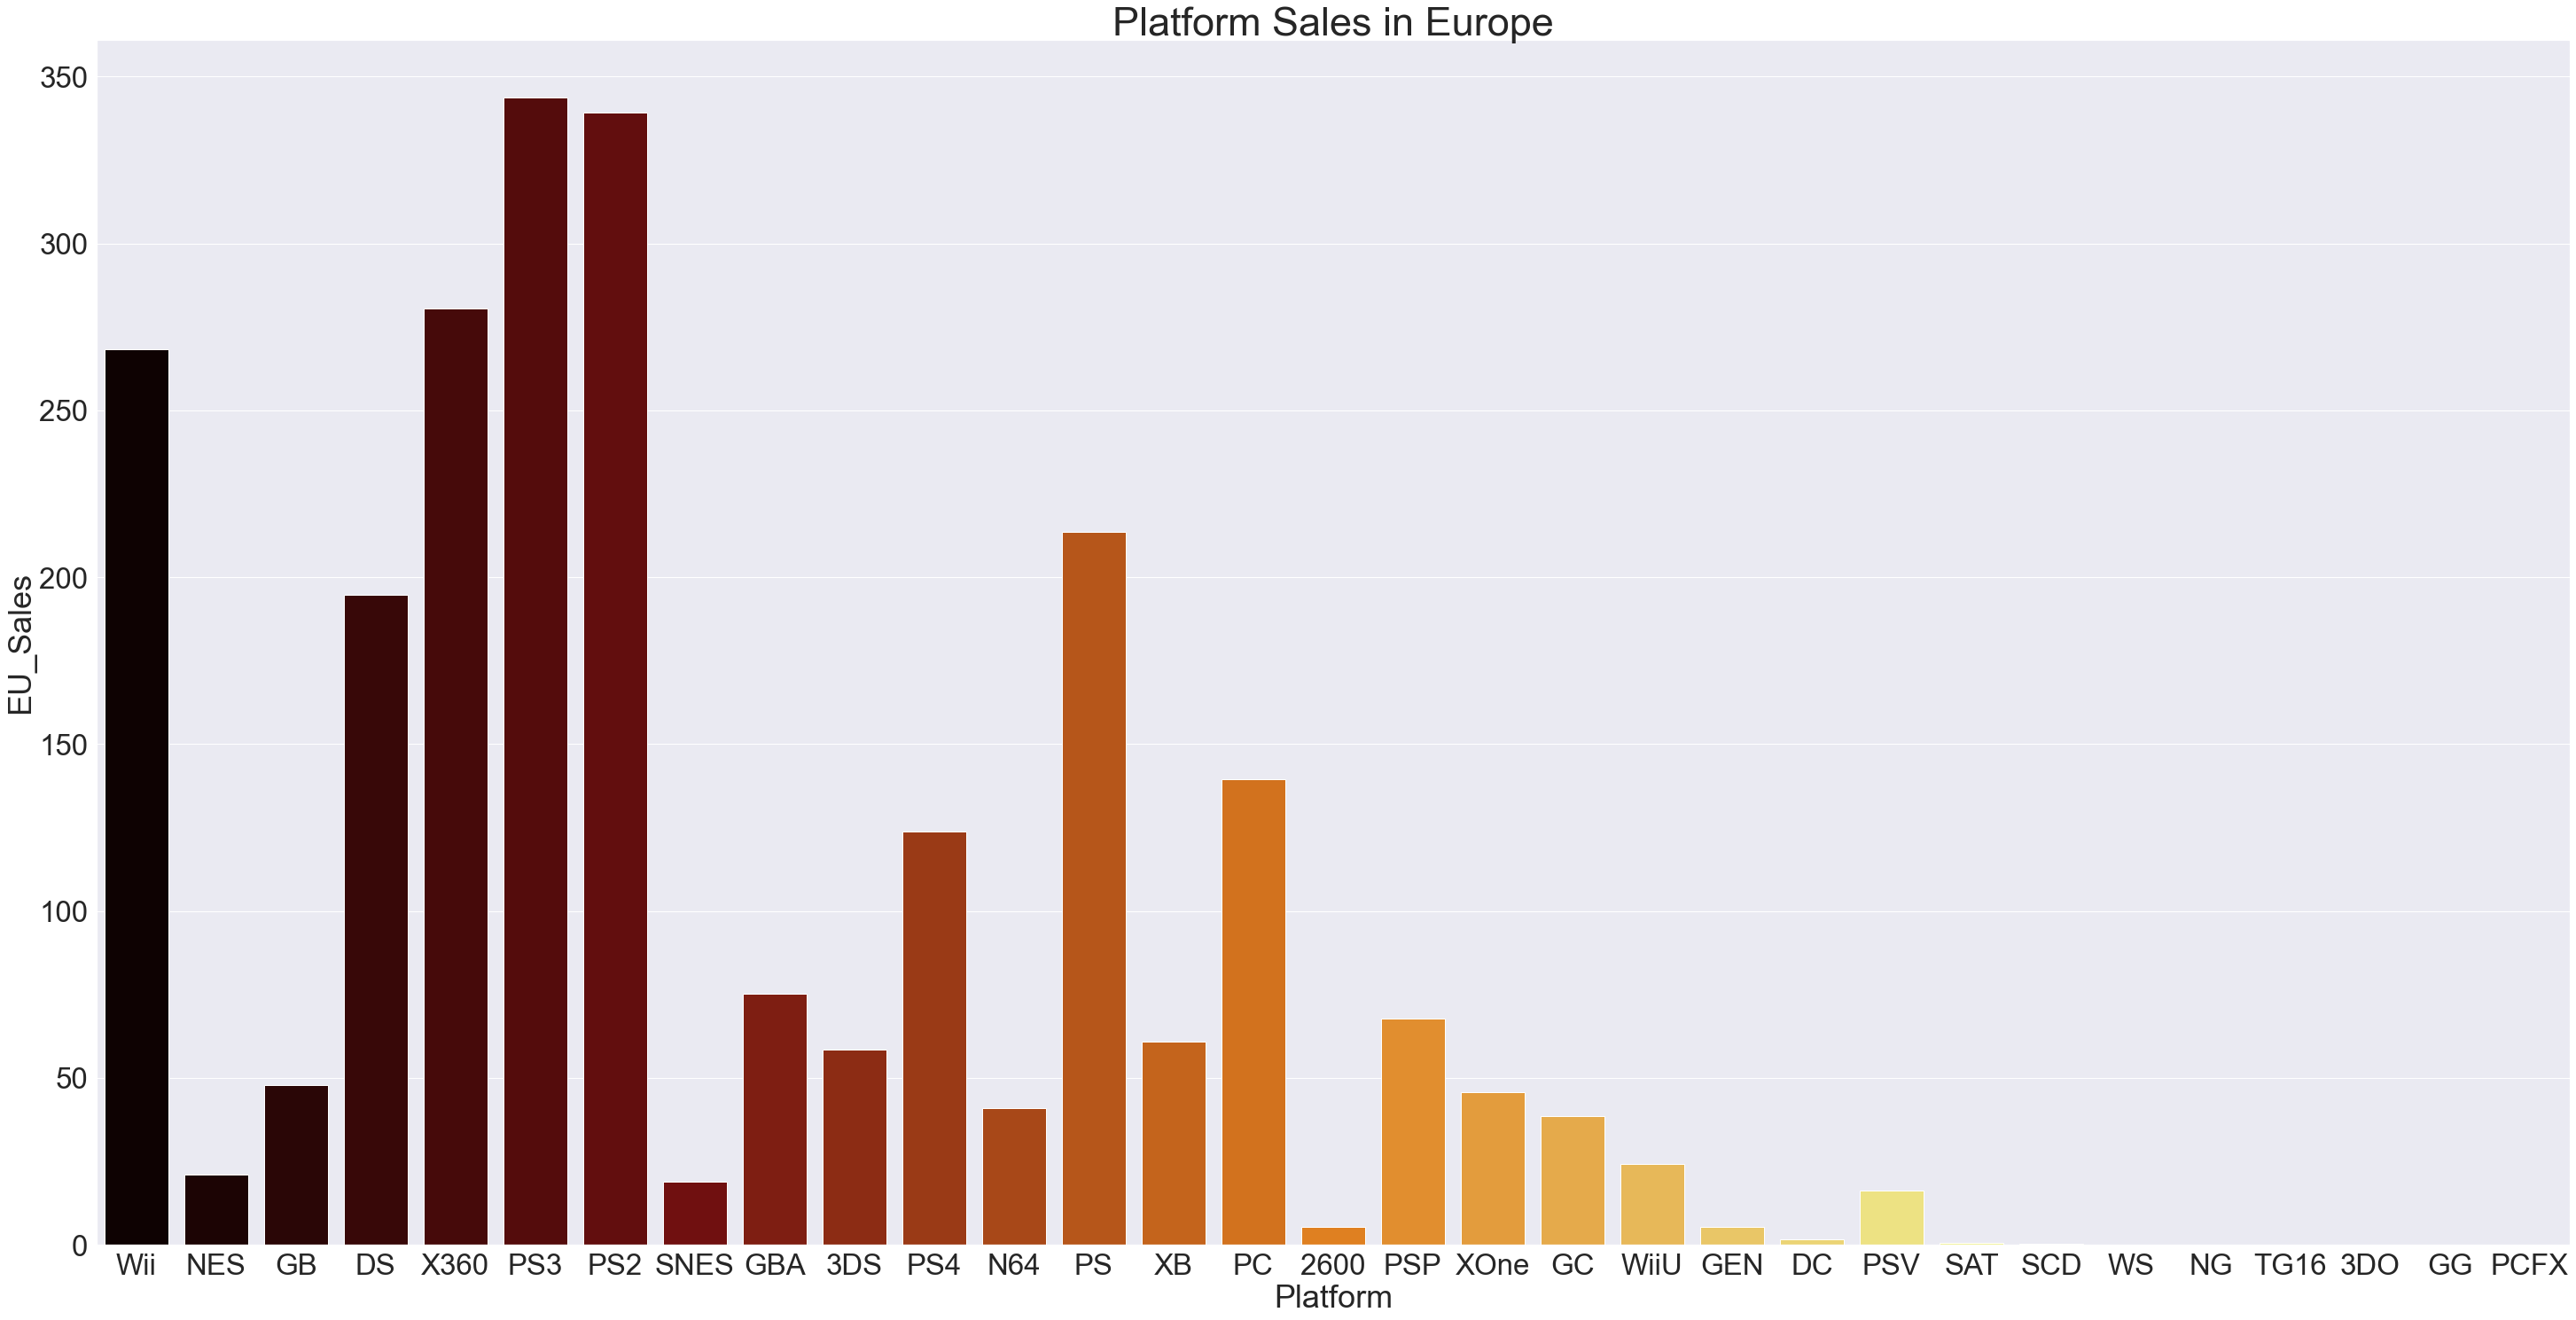

In [19]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.set(font_scale = 3)
sns.barplot(data = clean_df, 
            x = 'Platform', 
            y = 'EU_Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('afmhot', n_colors = 31)).set_title('Platform Sales in Europe', fontdict = {'size': 45})
wrap_labels(ax, 10)

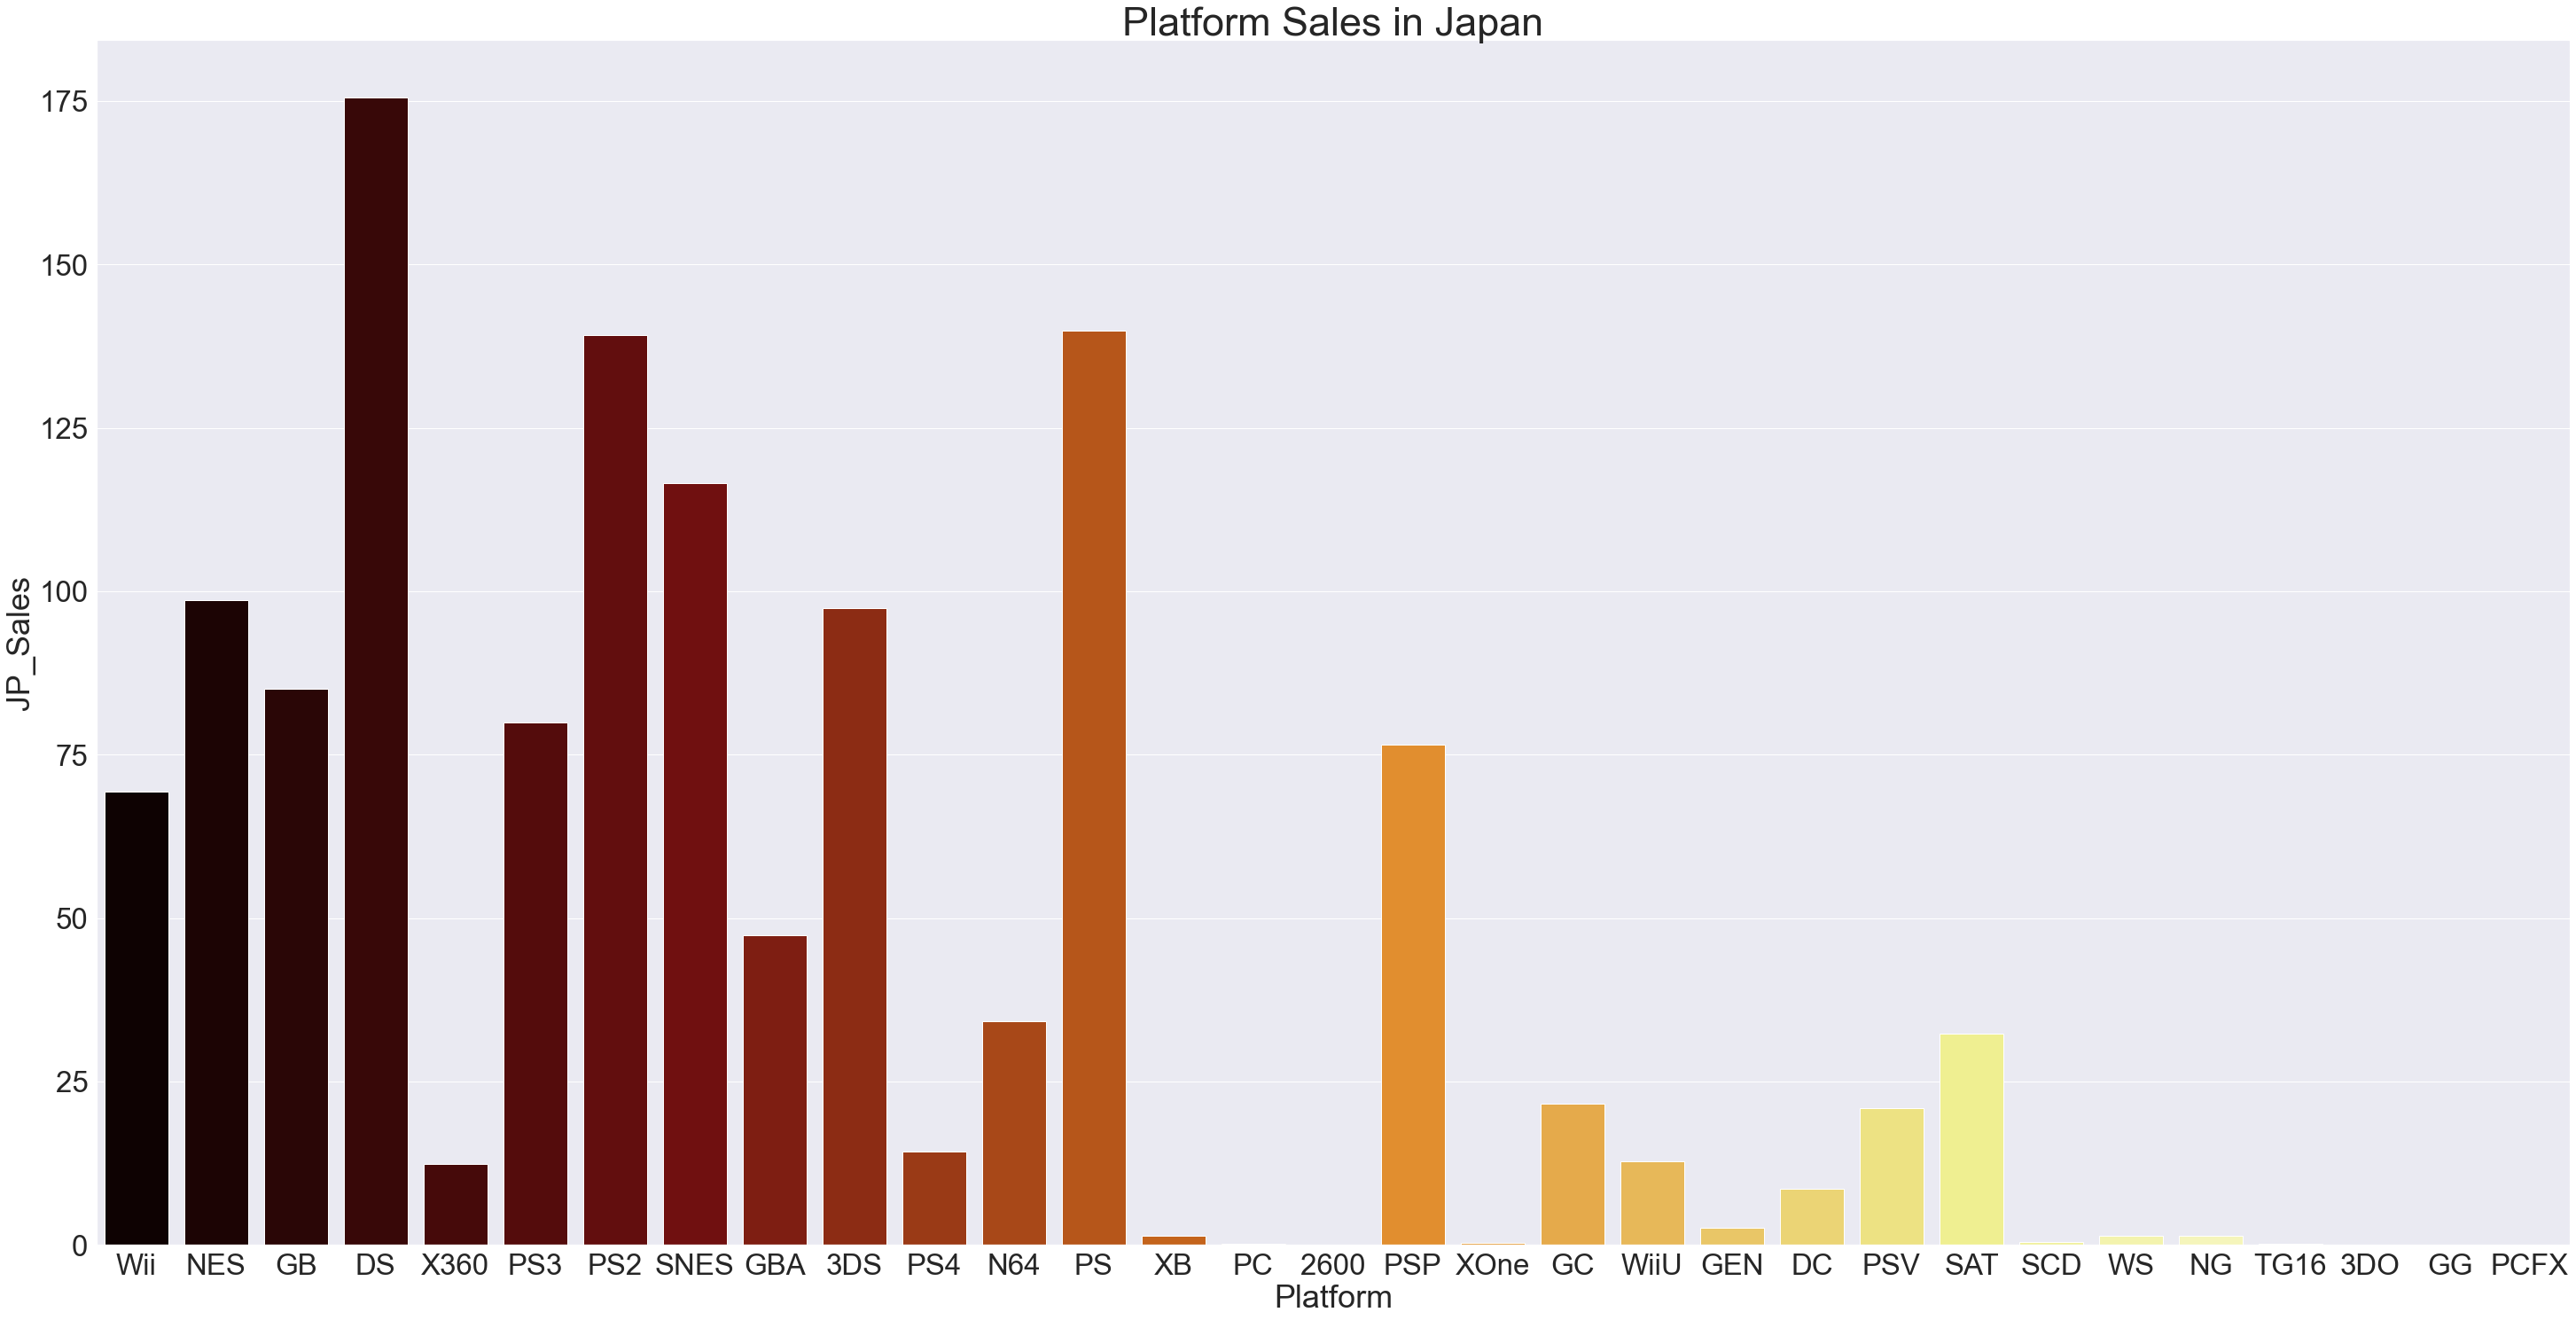

In [20]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.set(font_scale = 3)
sns.barplot(data = clean_df, 
            x = 'Platform', 
            y = 'JP_Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('afmhot', n_colors = 31)).set_title('Platform Sales in Japan', fontdict = {'size': 45})
wrap_labels(ax, 10)

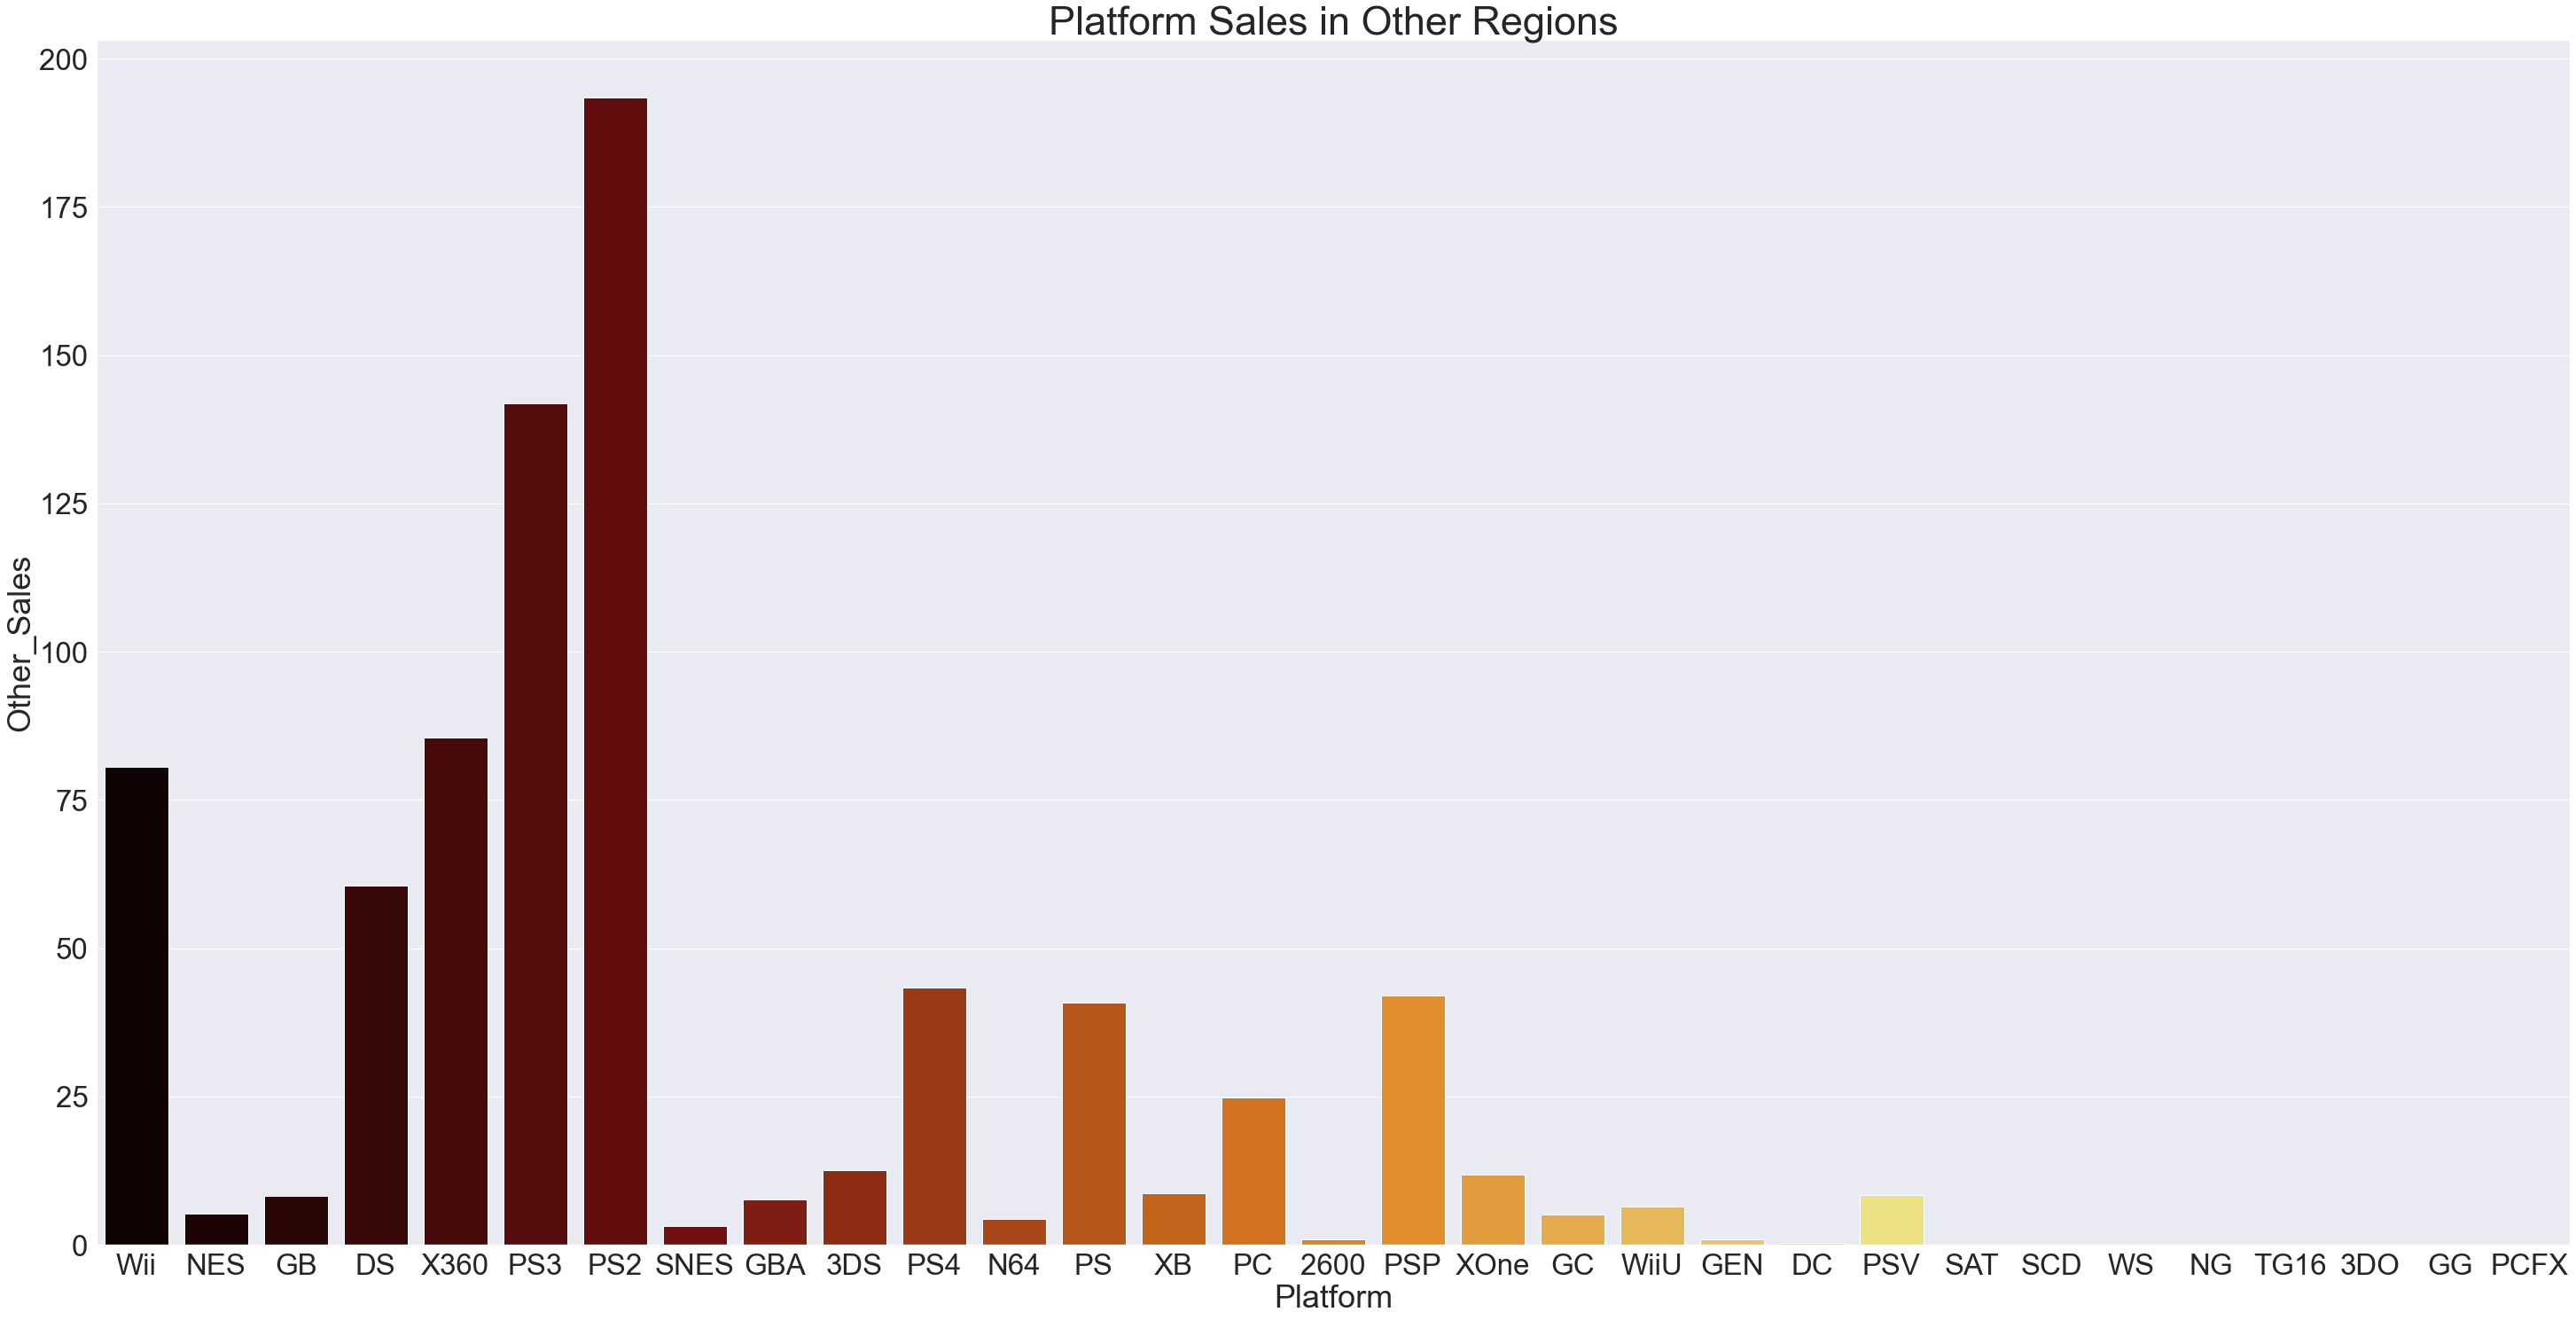

In [21]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.set(font_scale = 3)
sns.barplot(data = clean_df, 
            x = 'Platform', 
            y = 'Other_Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('afmhot', n_colors = 31)).set_title('Platform Sales in Other Regions', fontdict = {'size': 45})
wrap_labels(ax, 10)

## Genre Release & Sales Distribution

In [22]:
genre_count = clean_df['Genre'].value_counts()
genre_count

Action          3301
Sports          2359
Misc            1733
Role-Playing    1487
Shooter         1308
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           587
Name: Genre, dtype: int64

In [23]:
palette = sns.color_palette("tab20", 12).as_hex()
print(palette)

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94']


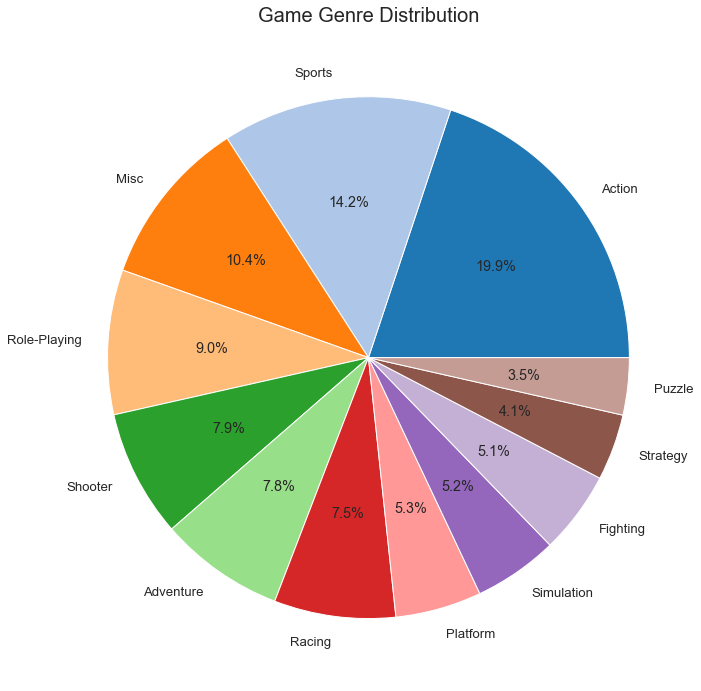

In [24]:
tab20 = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', 
         '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94']
labels = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure',
          'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']

fig, ax = plt.subplots(figsize=(20, 12))
sns.set(font_scale = 1.2)
patches, texts, autotexts = plt.pie(genre_count,
                                    colors = tab20,
                                    labels = labels,
                                    autopct='%1.1f%%')
plt.title('Game Genre Distribution', loc = 'center', pad = 10, fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Genre Sales Globally')

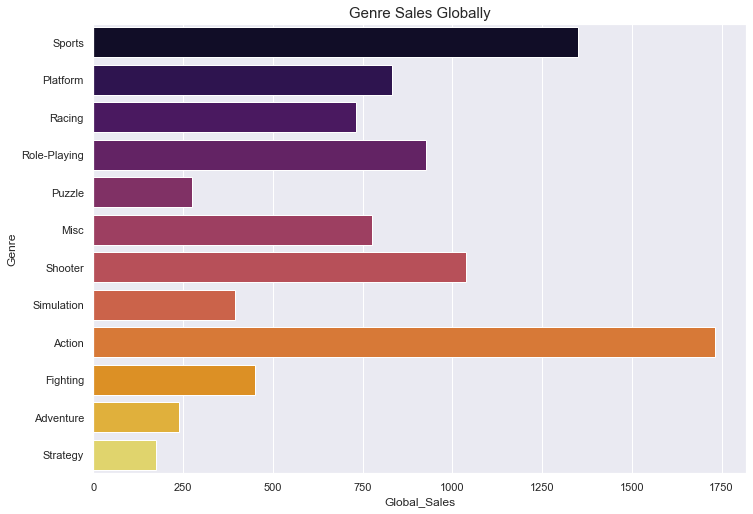

In [25]:
sns.set(font_scale = 1)
sns.barplot(data = clean_df, 
            x = 'Global_Sales', 
            y = 'Genre',
            orient = 'h',
            palette = sns.color_palette('inferno', 12),
            estimator = sum,
            ci = None).set_title('Genre Sales Globally', fontdict = {'size': 15})

There is a total of 12 different genres where games were released in; the games are relatively evenly distributed amongst the 12, with the difference between the genre with the highest number of games released on and the lowest at 16.4%.

Most of the games are released under the 'Action' genre, followed by the 'Sports' genre - which are also the top and second top-selling genres globally. The genre with the least number of games released in, 'Puzzle', however, is not the genre with the least sales ('Strategy'). 

The trend is generally uniform in all the regions (i.e. 'Action' genre being the best-selling, followed by 'Sports', with 'Strategy' having the least sales) except in Japan where the 'Role-Playing' genre is the best-selling genre and far surpasses the second best-selling genre ('Action') with a huge lead. Interestingly, the 'Strategy' genre is not the one with the least sales as well; the genre with the least sales in Japan actually goes to 'Shooter'. This is an interesting phenomenon which we can delve further into to see the possible drivers for the high sales in the 'Role-Playing' genre which seems to only occur in Japan.

Text(0.5, 1.0, 'Genre Sales in North America')

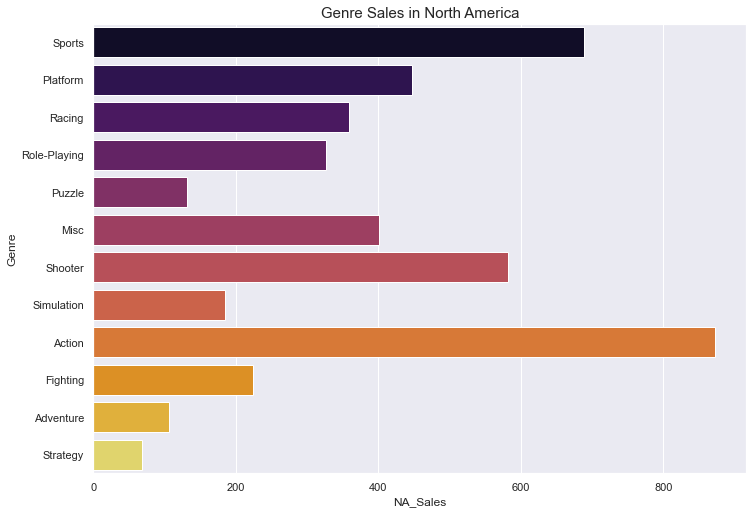

In [26]:
sns.barplot(data = clean_df, 
            x = 'NA_Sales', 
            y = 'Genre',
            orient = 'h',
            palette = sns.color_palette('inferno', 12),
            estimator = sum,
            ci = None).set_title('Genre Sales in North America', fontdict = {'size': 15})

Text(0.5, 1.0, 'Genre Sales in Europe')

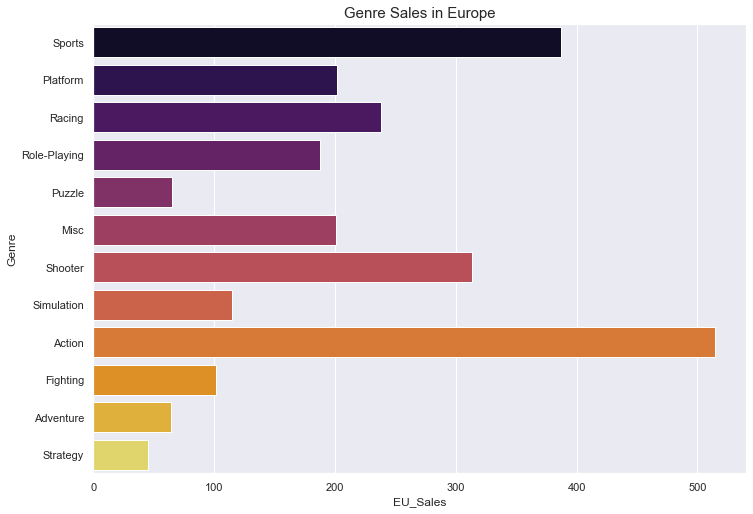

In [27]:
sns.barplot(data = clean_df, 
            x = 'EU_Sales', 
            y = 'Genre',
            orient = 'h',
            palette = sns.color_palette('inferno', 12),
            estimator = sum, 
            ci = None).set_title('Genre Sales in Europe', fontdict = {'size': 15})

Text(0.5, 1.0, 'Genre Sales in Japan')

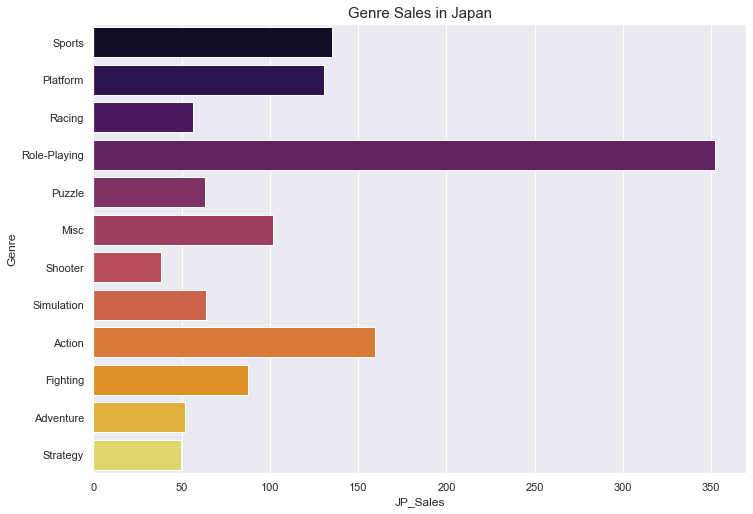

In [28]:
sns.barplot(data = clean_df, 
            x = 'JP_Sales', 
            y = 'Genre',
            orient = 'h',
            palette = sns.color_palette('inferno', 12),
            estimator = sum,
            ci = None).set_title('Genre Sales in Japan', fontdict = {'size': 15})

Text(0.5, 1.0, 'Genre Sales in Other Regions')

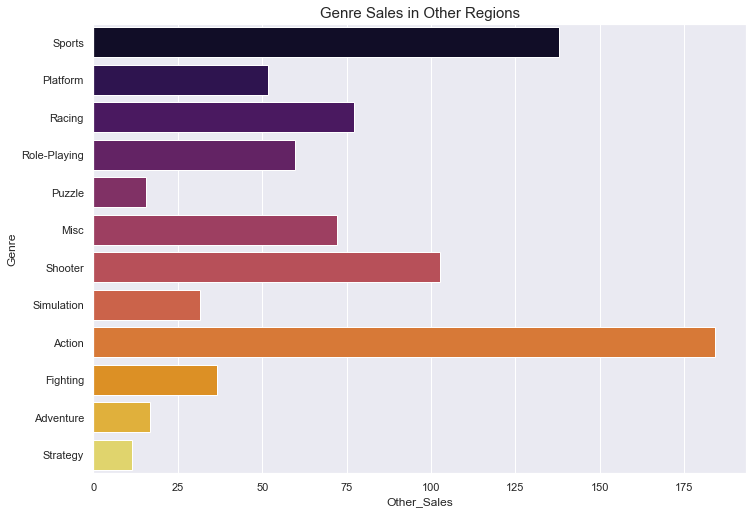

In [29]:
sns.barplot(data = clean_df, 
            x = 'Other_Sales', 
            y = 'Genre',
            orient = 'h',
            palette = sns.color_palette('inferno', 12),
            estimator = sum,
            ci = None).set_title('Genre Sales in Other Regions', fontdict = {'size': 15})

## Top-Selling Games

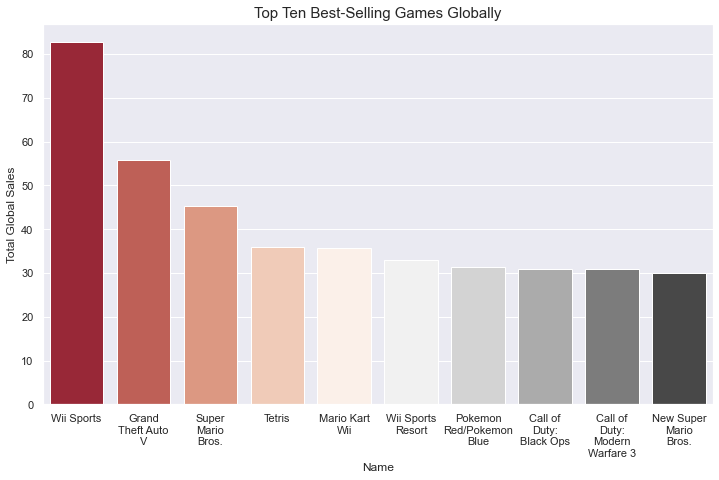

In [30]:
top_selling_games = pd.pivot_table(clean_df,
                                   index = ["Name", "Genre"],
                                   values=["Global_Sales"],
                                   aggfunc=[np.sum])

top_selling_games = top_selling_games.reset_index()
top_selling_games.columns = ['Name', 'Genre', 'Total Global Sales']

fig, ax = plt.subplots(figsize=(12, 7))
sns.set(font_scale = 1)
sns.barplot(data = top_selling_games.nlargest(10, 'Total Global Sales'), 
            x = 'Name', 
            y = 'Total Global Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('RdGy', n_colors = 10)).set_title('Top Ten Best-Selling Games Globally', fontdict = {'size': 15})
wrap_labels(ax, 10)

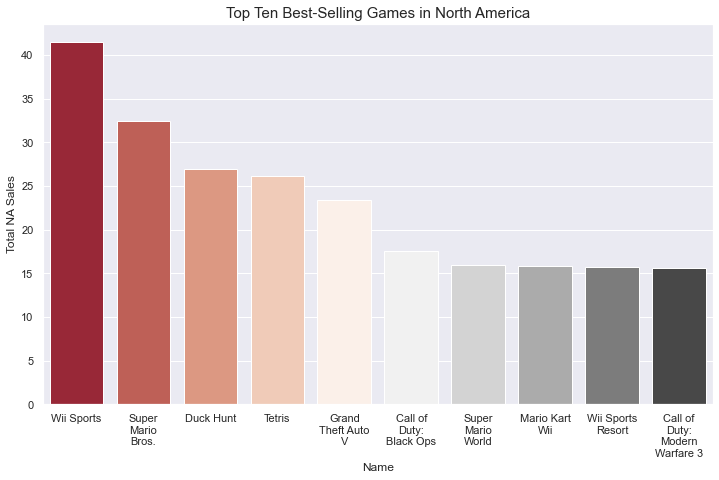

In [31]:
top_selling_NA = pd.pivot_table(clean_df,
                                index = ["Name", "Genre"],
                                values=["NA_Sales"],
                                aggfunc=[np.sum])

top_selling_NA = top_selling_NA.reset_index()
top_selling_NA.columns = ['Name', 'Genre', 'Total NA Sales']

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = top_selling_NA.nlargest(10, 'Total NA Sales'), 
            x = 'Name', 
            y = 'Total NA Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('RdGy', n_colors = 10)).set_title('Top Ten Best-Selling Games in North America', fontdict = {'size': 15})
wrap_labels(ax, 10)

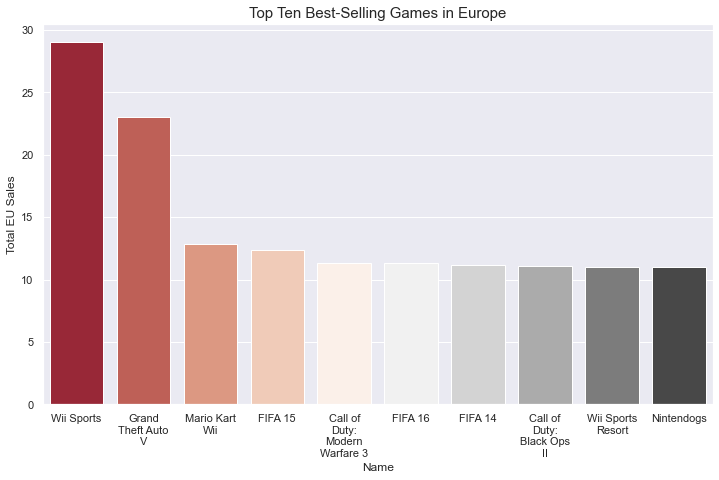

In [32]:
top_selling_EU = pd.pivot_table(clean_df,
                                index = ["Name", "Genre"],
                                values=["EU_Sales"],
                                aggfunc=[np.sum])

top_selling_EU = top_selling_EU.reset_index()
top_selling_EU.columns = ['Name', 'Genre', 'Total EU Sales']

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = top_selling_EU.nlargest(10, 'Total EU Sales'), 
            x = 'Name', 
            y = 'Total EU Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('RdGy', n_colors = 10)).set_title('Top Ten Best-Selling Games in Europe', fontdict = {'size': 15})
wrap_labels(ax, 10)

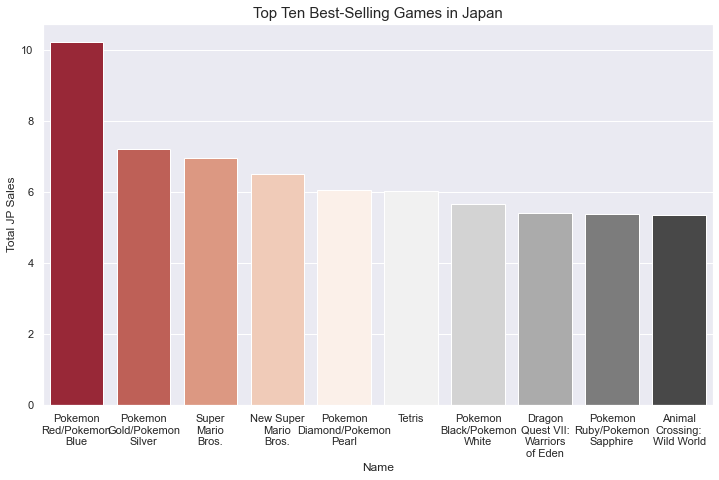

In [33]:
top_selling_JP = pd.pivot_table(clean_df,
                                index = ["Name", "Genre"],
                                values=["JP_Sales"],
                                aggfunc=[np.sum])

top_selling_JP = top_selling_JP.reset_index()
top_selling_JP.columns = ['Name', 'Genre', 'Total JP Sales']

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = top_selling_JP.nlargest(10, 'Total JP Sales'), 
            x = 'Name', 
            y = 'Total JP Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('RdGy', n_colors = 10)).set_title('Top Ten Best-Selling Games in Japan', fontdict = {'size': 15})
wrap_labels(ax, 10)

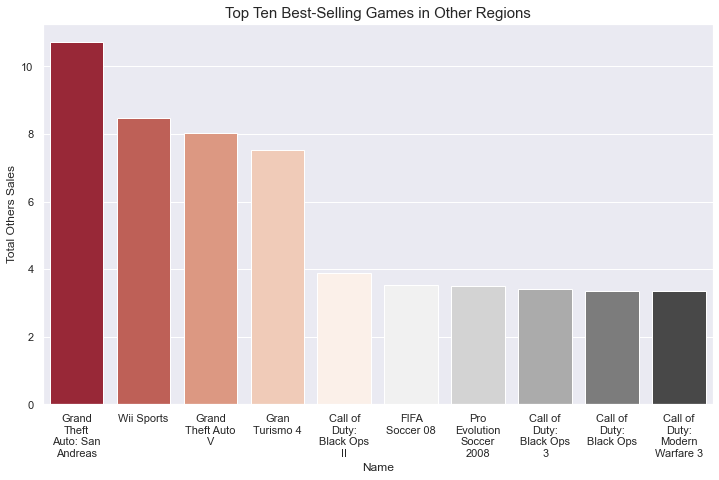

In [34]:
top_selling_others = pd.pivot_table(clean_df,
                                    index = ["Name", "Genre"],
                                    values=["Other_Sales"],
                                    aggfunc=[np.sum])

top_selling_others = top_selling_others.reset_index()
top_selling_others.columns = ['Name', 'Genre', 'Total Others Sales']

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = top_selling_others.nlargest(10, 'Total Others Sales'), 
            x = 'Name', 
            y = 'Total Others Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('RdGy', n_colors = 10)).set_title('Top Ten Best-Selling Games in Other Regions', fontdict = {'size': 15})
wrap_labels(ax, 10)

We can observe at least three of the global top ten best-selling games falling under the top-ten list in the various regions, with a few games appearing in more than one (e.g. Wii Sports in NA, EU and Others).

## Top Publishers

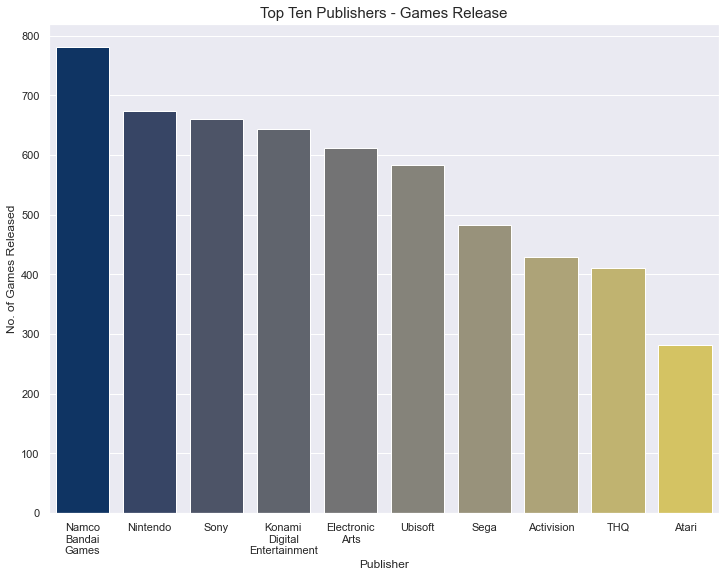

In [35]:
publisher_release_pvt = pd.pivot_table(clean_df,
                                       index = ["Main Publisher"],
                                       values = ["Name"],
                                       aggfunc = lambda x: len(x.unique()))
#Unique count to avoid double-counting same game titles released under multiple platforms
publisher_release_pvt = publisher_release_pvt.sort_values(by = ['Name'], ascending = False)
publisher_release_df = publisher_release_pvt.reset_index()
publisher_release_df.columns = ['Publisher', 'No. of Games Released']

#Delving into top 10 publishers release-wise
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(data = publisher_release_df.nlargest(10, 'No. of Games Released'), 
            x = 'Publisher', 
            y = 'No. of Games Released',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('cividis', n_colors = 10)).set_title('Top Ten Publishers - Games Release', fontdict = {'size': 15})
wrap_labels(ax, 10)

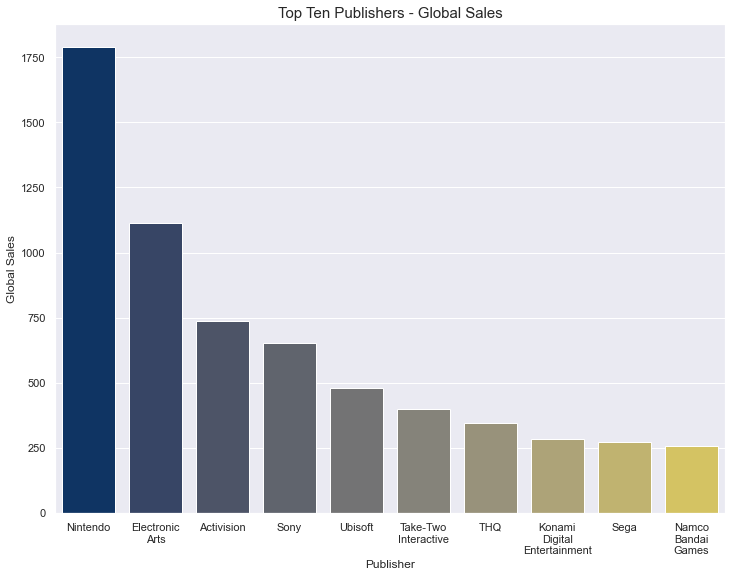

In [36]:
publisher_sales_pvt = pd.pivot_table(clean_df,index=["Main Publisher"],values=["Global_Sales"],aggfunc=np.sum)
publisher_sales_pvt = publisher_sales_pvt.sort_values(by = ['Global_Sales'], ascending = False)
publisher_sales_df = publisher_sales_pvt.reset_index()
publisher_sales_df.columns = ['Publisher', 'Global Sales']

#Delving into top 10 publishers sales-wise
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(data = publisher_sales_df.nlargest(10, 'Global Sales'), 
            x = 'Publisher', 
            y = 'Global Sales',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('cividis', n_colors = 10)).set_title('Top Ten Publishers - Global Sales', fontdict = {'size': 15})
wrap_labels(ax, 10)

## Top 3 Publishers' (Sales) Individual Deep Dive

In [37]:
publisher_genre_sales_pvt = pd.pivot_table(clean_df, 
                                           index = ['Publisher', 'Genre'], 
                                           values = ['Global_Sales'],
                                           aggfunc = np.sum,
                                           fill_value = 0,
                                           margins = True)
publisher_genre_sales_df = publisher_genre_sales_pvt.reset_index()

top3_publisher_sales = ['Nintendo', 'Electronic Arts', 'Activision']
#Looking at top 3 publishers sales-wise
publisher_genre_sales_df = publisher_genre_sales_df.loc[publisher_genre_sales_df['Publisher'].isin(top3_publisher_sales)]

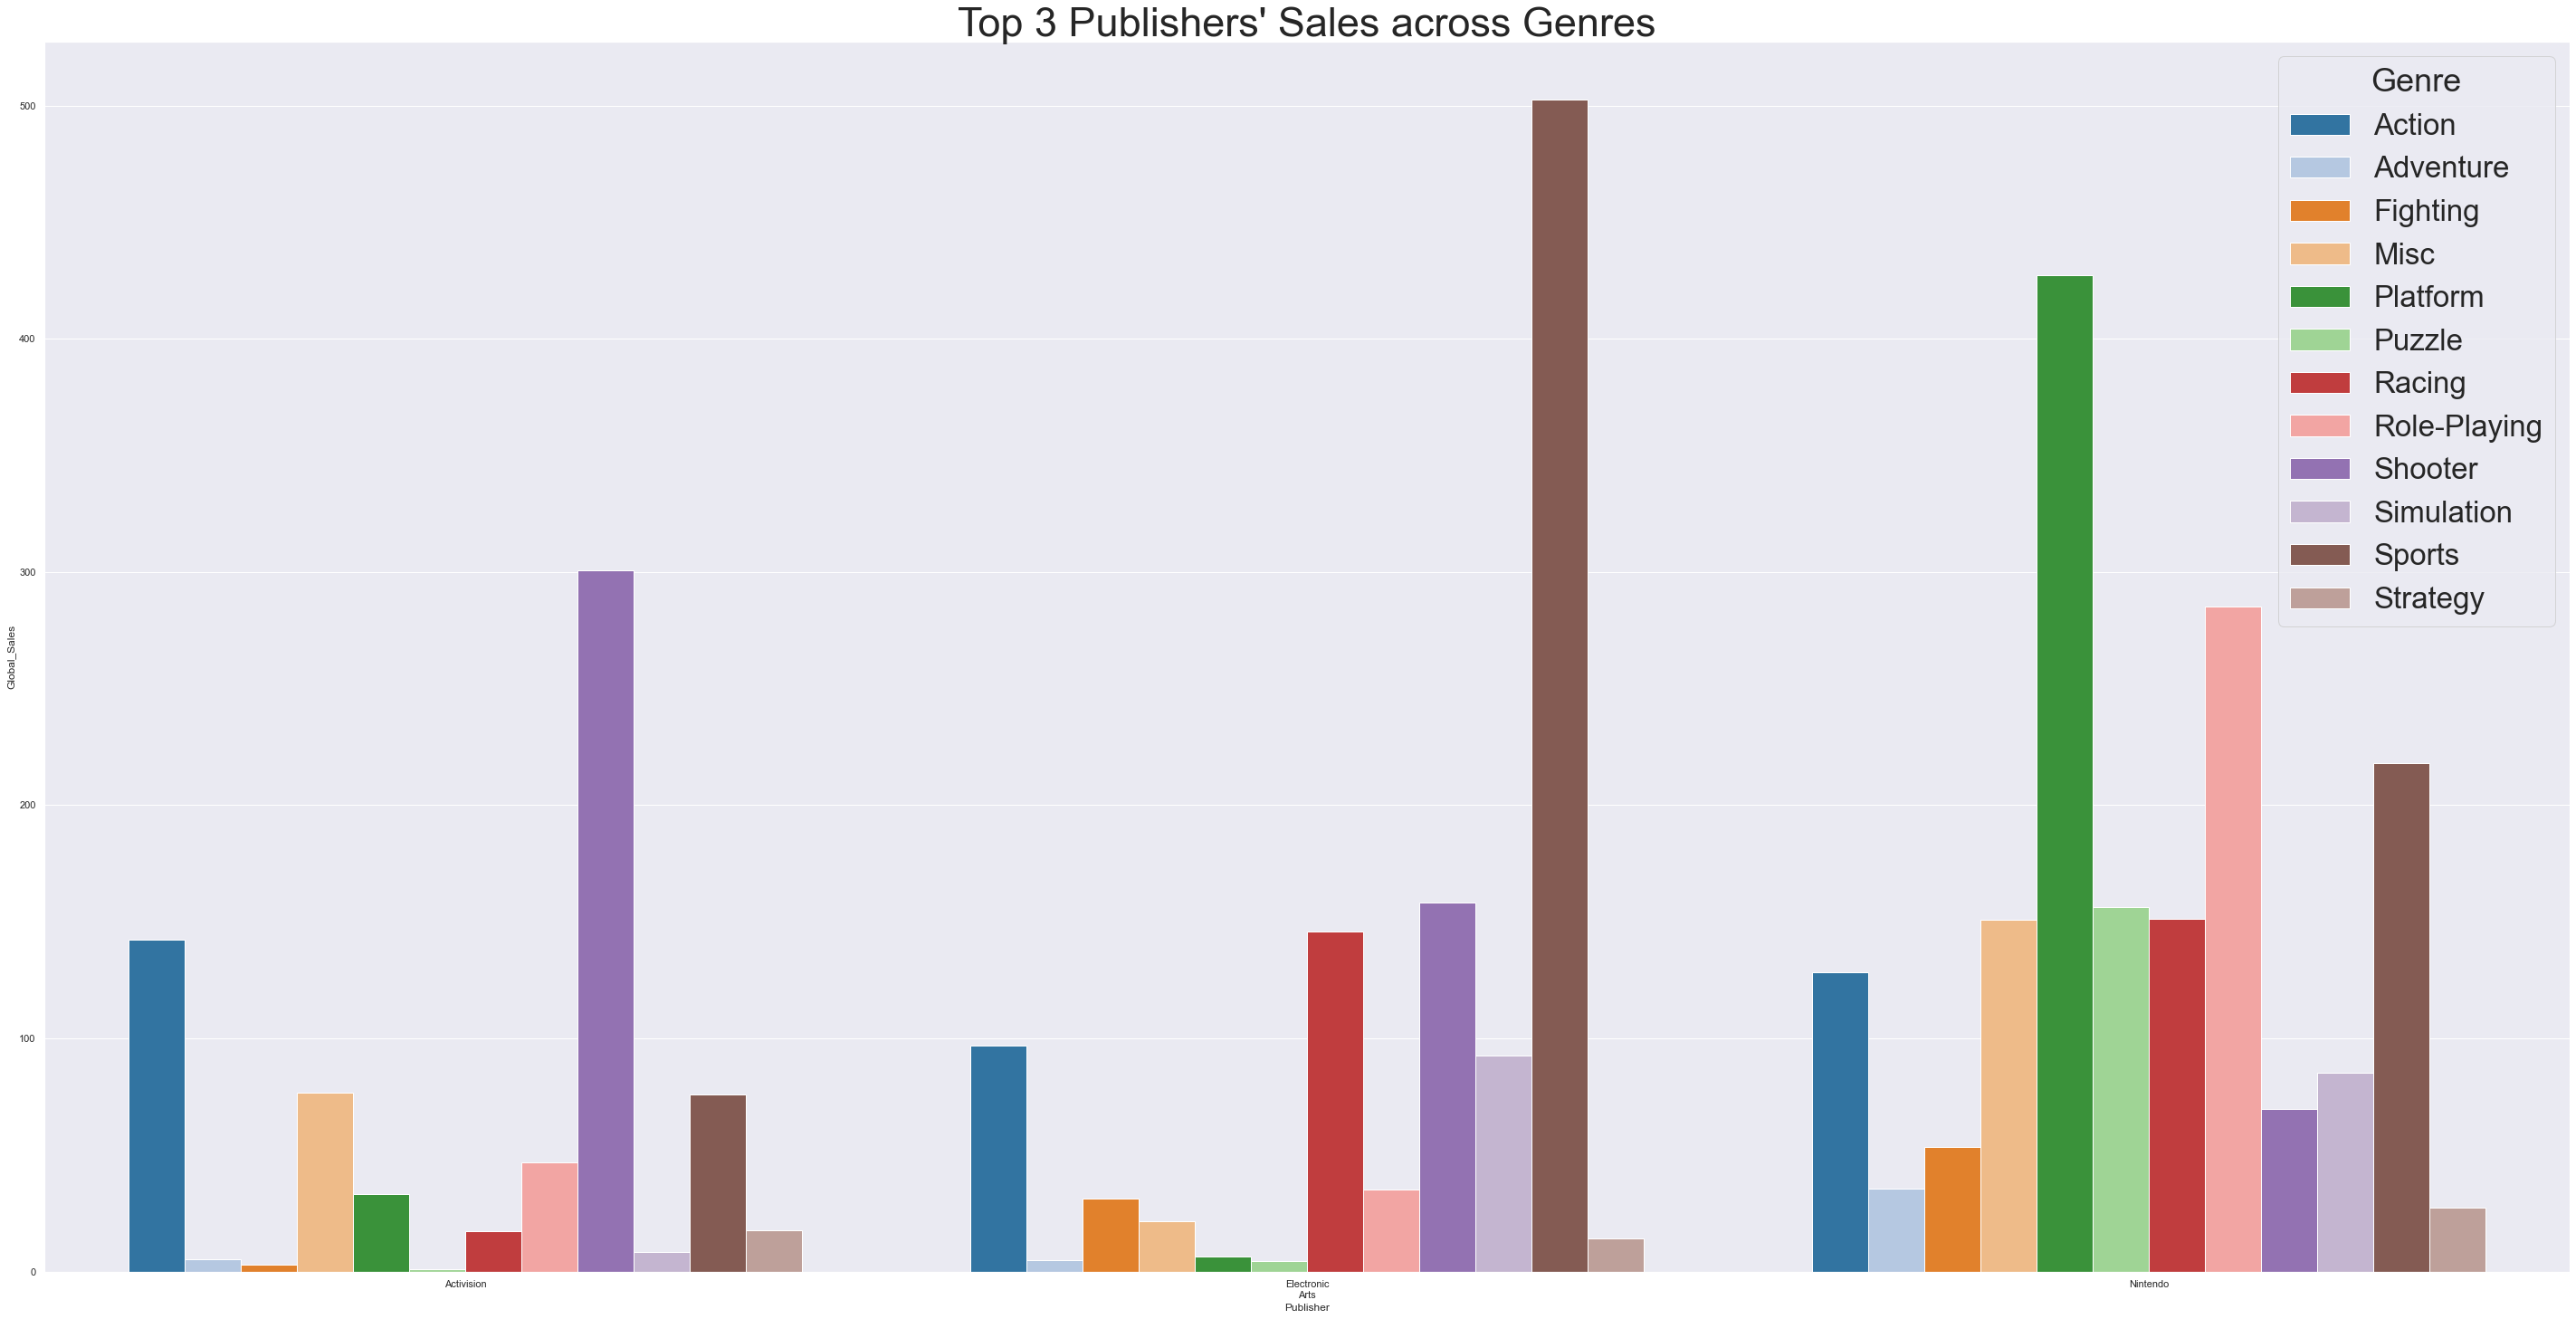

In [38]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.set(font_scale = 3)
sns.barplot(data = publisher_genre_sales_df, 
            x = 'Publisher', 
            y = 'Global_Sales',
            hue = 'Genre',
            estimator = sum,
            palette = sns.color_palette('tab20', n_colors = 12)).set_title("Top 3 Publishers' Sales across Genres", fontdict = {'size': 45})
wrap_labels(ax, 10)

In [39]:
publisher_genre_release_pvt = pd.pivot_table(clean_df, 
                                             index = ['Main Publisher', 'Genre'],
                                             values = ['Name'],
                                             aggfunc = lambda x: len(x.unique()))
publisher_genre_release_df = publisher_genre_release_pvt.reset_index()
publisher_genre_release_df.columns = ['Publisher', 'Genre', 'No. of Games Released']

publisher_genre_release_df = publisher_genre_release_df.loc[publisher_genre_release_df['Publisher'].isin(top3_publisher_sales)]

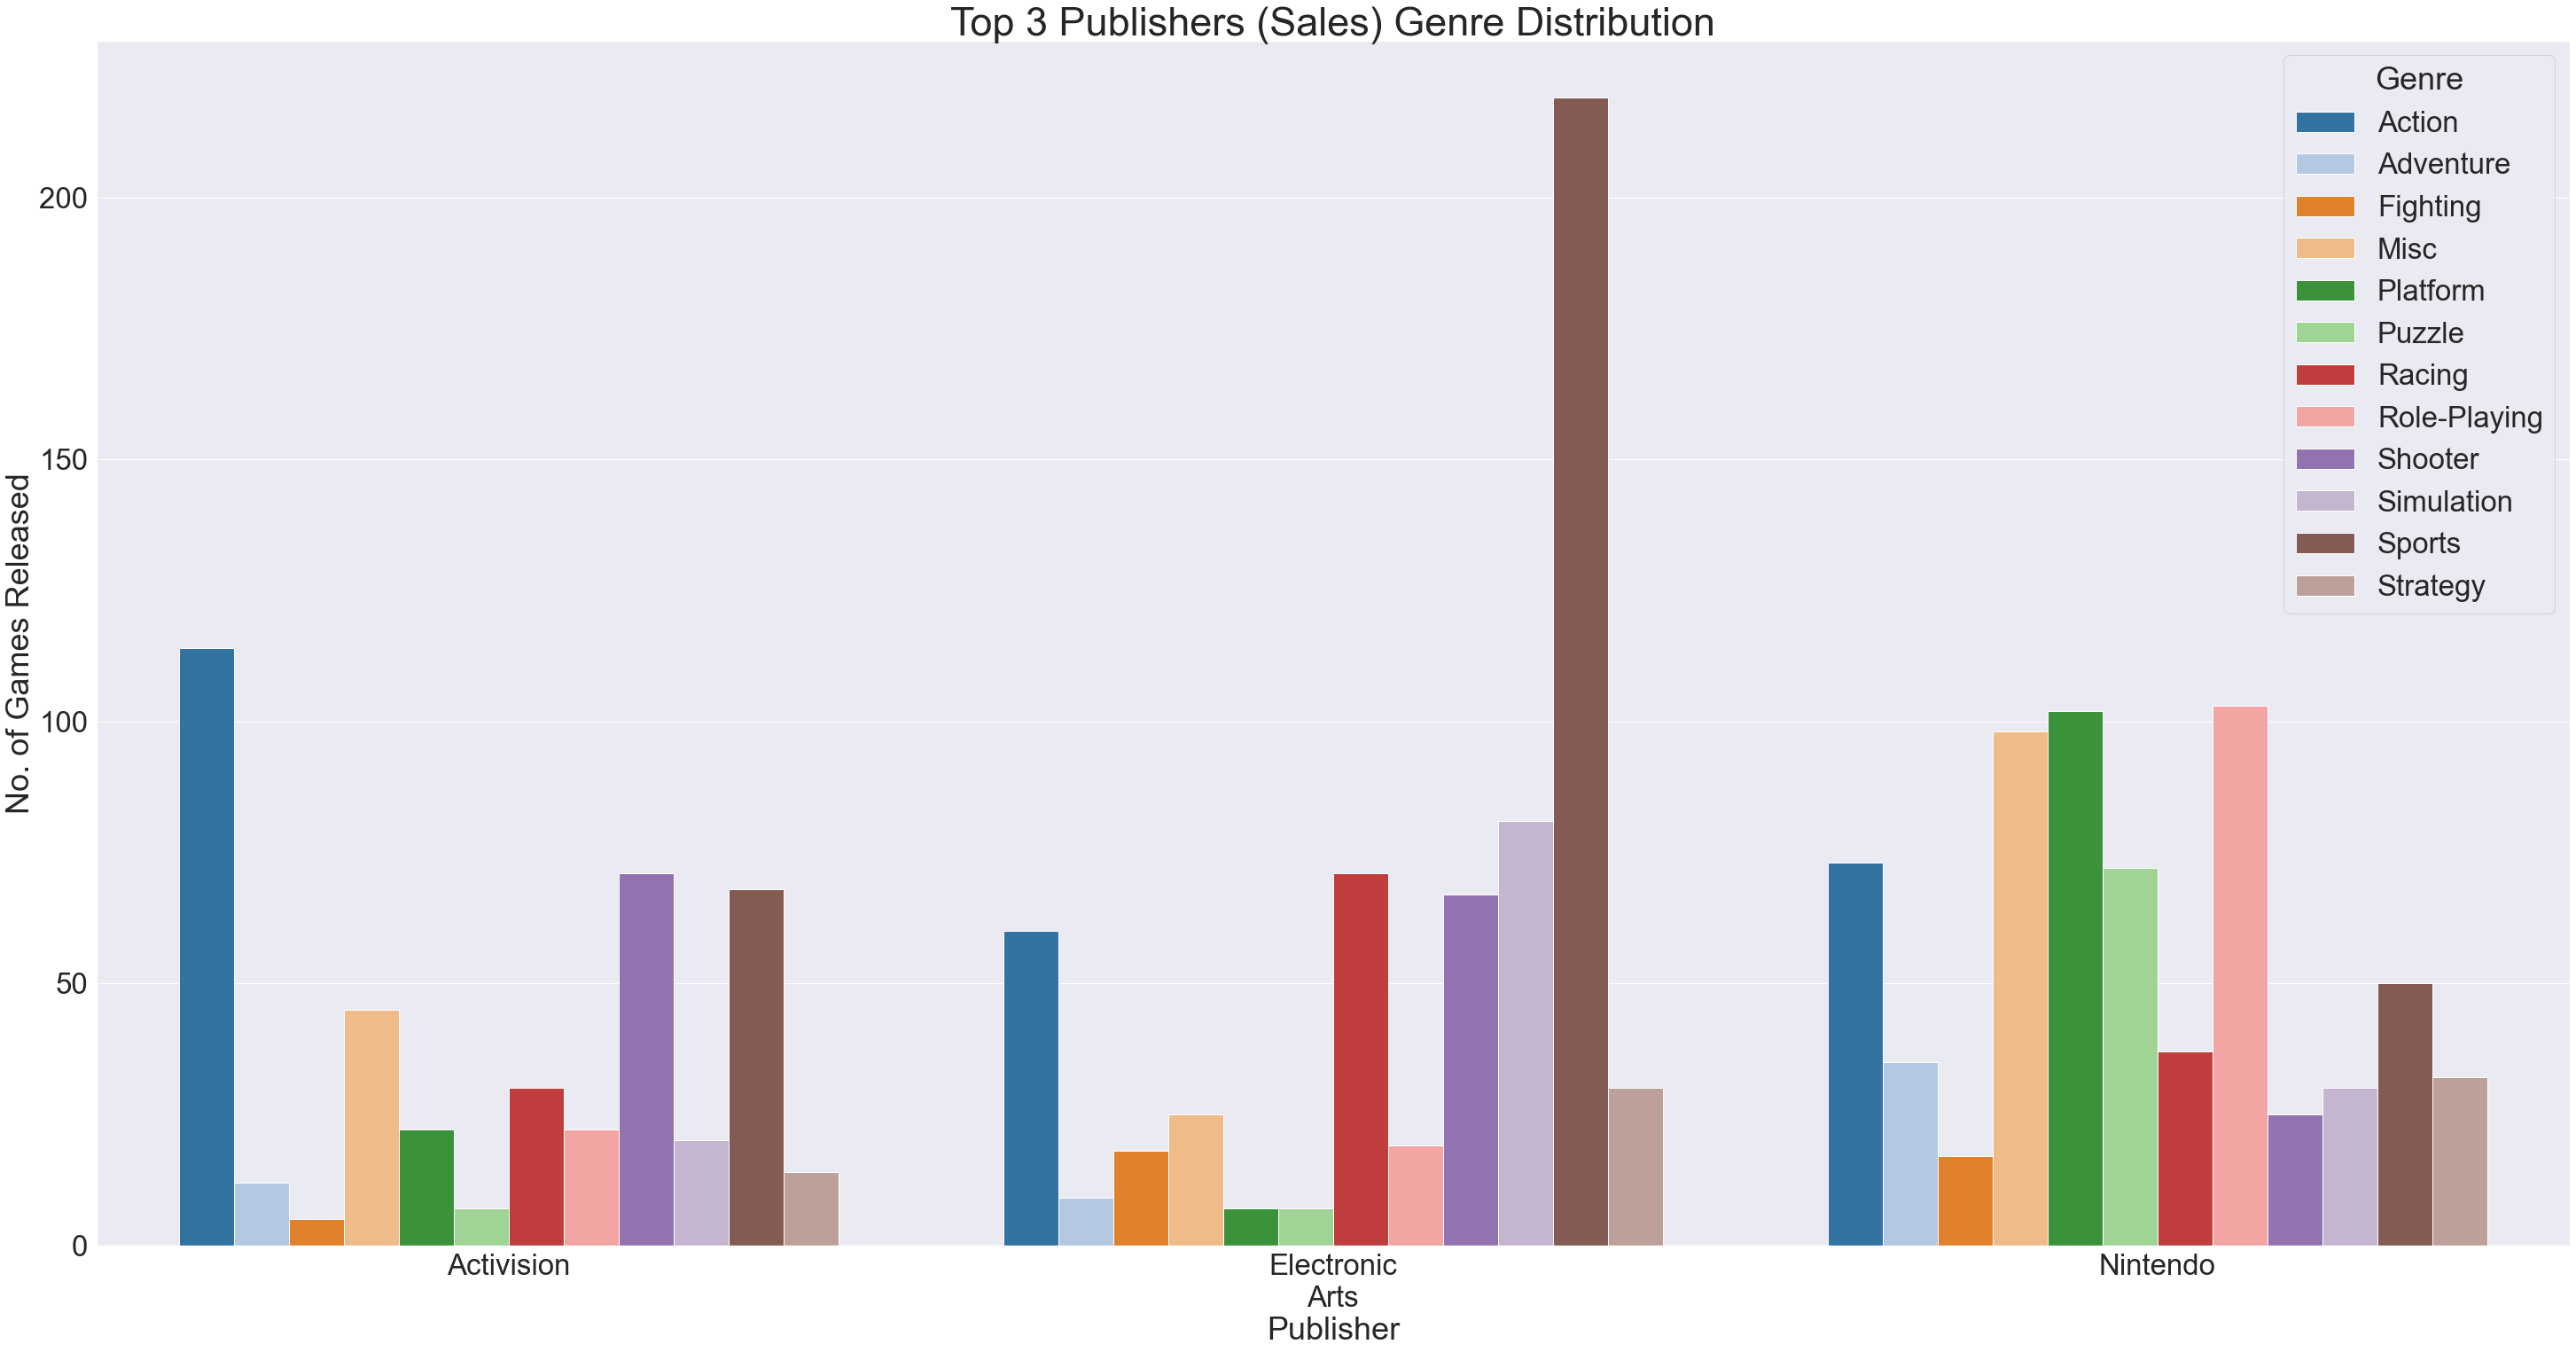

In [40]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.set(font_scale = 3)
sns.barplot(data = publisher_genre_release_df, 
            x = 'Publisher', 
            y = 'No. of Games Released',
            hue = 'Genre',
            palette = sns.color_palette('tab20', n_colors = 12)).set_title("Top 3 Publishers (Sales) Genre Distribution", fontdict = {'size': 45})

wrap_labels(ax, 10)

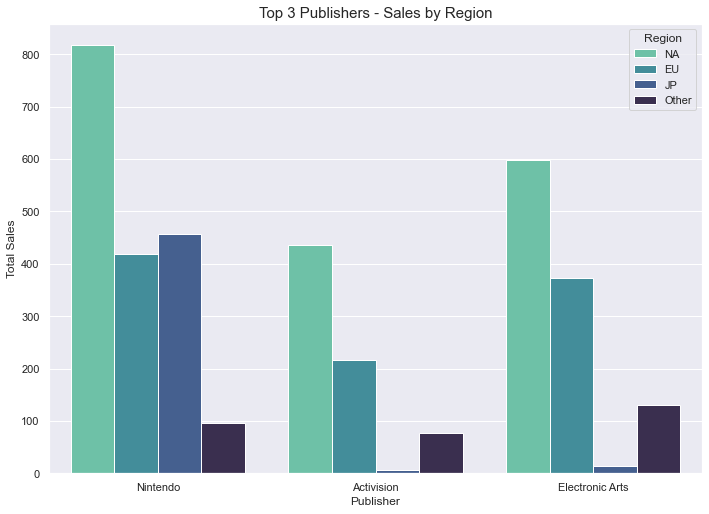

In [41]:
top3_sales_regions = clean_df.loc[clean_df['Main Publisher'].isin(top3_publisher_sales)]

top3_sales_regions = top3_sales_regions.drop(['Rank', 'Global_Sales', 'Publisher'], axis = 1)
top3_sales_regions = top3_sales_regions.melt(id_vars = ['Name', 'Platform', 'Year', 'Genre', 'Main Publisher'],
                                             var_name = 'Region',
                                             value_name = 'Total Sales')

top3_sales_regions.loc[top3_sales_regions['Region'] == 'NA_Sales', 'Region'] = 'NA'
top3_sales_regions.loc[top3_sales_regions['Region'] == 'EU_Sales', 'Region'] = 'EU'
top3_sales_regions.loc[top3_sales_regions['Region'] == 'JP_Sales', 'Region'] = 'JP'
top3_sales_regions.loc[top3_sales_regions['Region'] == 'Other_Sales', 'Region'] = 'Other'

top3_sales_regions.columns = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Region', 'Total Sales']

sns.set(font_scale = 1)
sns.barplot(data = top3_sales_regions, 
            x = 'Publisher', 
            y = 'Total Sales',
            hue = 'Region',
            estimator = sum,
            ci = None,
            palette = sns.color_palette('mako_r', n_colors = 4)).set_title("Top 3 Publishers - Sales by Region", fontdict = {'size': 15})
wrap_labels(ax, 10)

While the 'Action' genre is the best-selling genre globally collectively, it does not reflect as so under the top three (sales-wise) game publishers' global sales. In fact, each of them has a best-selling genre different from each other which also highlights the genres of games that they specialise in.

Also, except for Electronic Arts, whose most released genre matches that of its best-selling, the other two publishers' best-selling genres are not their most released. It is even more interesting in Nintendo's case, given that it does not seem to focus on releasing games under a genre very much more than the others, but has exponential difference in sales between its best-selling genre and the rest.

Region-wise, the North American market is the biggest amongst the four for all three publishers with Nintendo fetching the highest in sales in the region - highlighting the influence and popularity of the publisher in the area, especially given that it is the only non-American publisher out of the three. On the contrary, the presence and influence of the other two publishers is the least in Japan.

In [42]:
top3_publisher_sales_df = clean_df.loc[clean_df['Publisher'].isin(top3_publisher_sales)]
print('Earliest Year Recorded:', top3_publisher_sales_df.Year.min())
print('Latest Year Recorded:', top3_publisher_sales_df.Year.max())

Earliest Year Recorded: 1980
Latest Year Recorded: 2016


Text(0.5, 1.0, "Top 3 Publishers' Sales Across the Years")

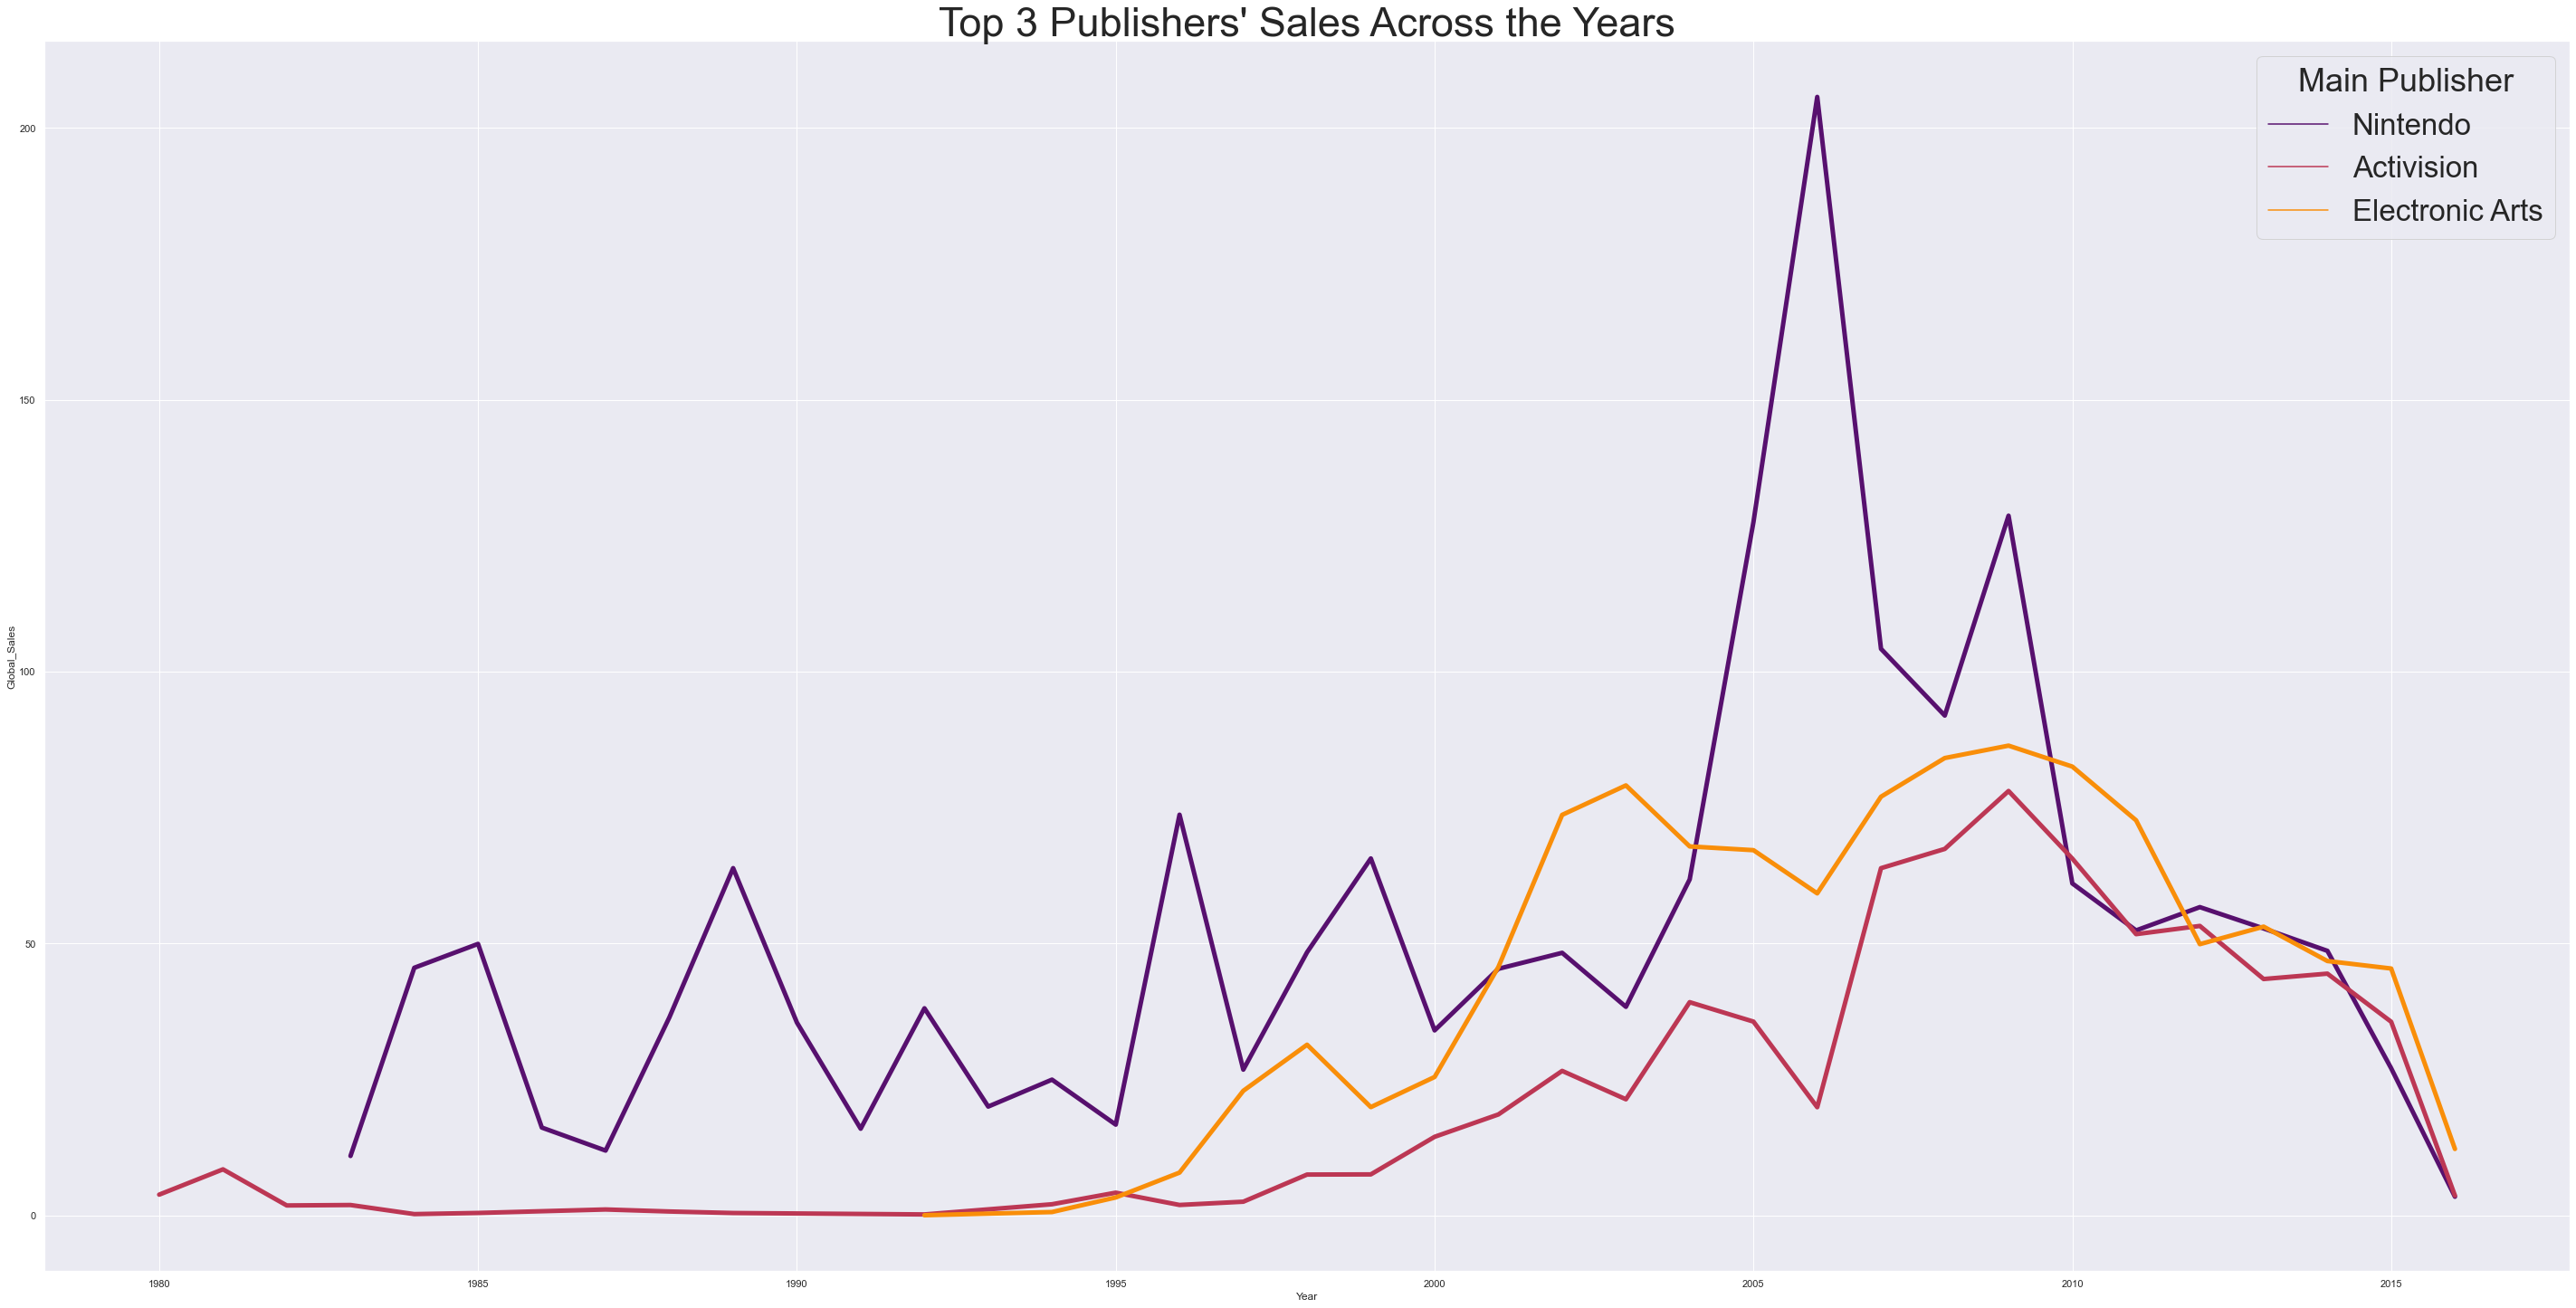

In [43]:
fig, ax = plt.subplots(figsize=(50, 25))
sns.set(font_scale = 3)
sns.lineplot(data = top3_publisher_sales_df, 
            x = 'Year', 
            y = 'Global_Sales',
            hue = 'Main Publisher',
            linewidth = 5,
            palette = sns.color_palette('inferno', 3),
            estimator = sum,
            ci = None).set_title("Top 3 Publishers' Sales Across the Years", fontdict = {'size': 45})

All three publishers have different starting years from each other - Nintendo in 1983, Activision in 1980 and Electronic Arts in 1992 - with different hikes and dips, dependent on each publishers' events and timelines which we will take a deeper dive into individually.

In [44]:
palette2 = sns.color_palette("inferno", 3).as_hex()
print(palette2)

['#57106e', '#bc3754', '#f98e09']
